In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csp.csv')

# EDA

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='%d-%m-%Y')

In [ ]:
data['month'] = data['date'].dt.month

In [ ]:
data.head()

date retailer  paid_clicks  paid_impressions  paid_ad_revenue  \
0 2018-01-01        A        23459          26364079            29778   
1 2018-01-01        B        12232          13972907            15057   
2 2018-01-02        A        25444          28855109            31795   
3 2018-01-02        B        14725          16614842            18121   
4 2018-01-03        A        27403          31057581            34370   

   organic_page_views  organic_transactions  organic_sales_units  \
0            14157871                281216               558736   
1             7868838                206671               429523   
2            12434724                249112               510431   
3             7573973                227567               428121   
4            15261160                305484               593544   

   organic_sales_revenue  month  
0               11167429      1  
1                8320277      1  
2               10178081      1  
3                8541935      1  
4               11996719      1

In [ ]:
data.shape

(180, 10)

In [ ]:
data.size

1800

In [ ]:
data.isna().sum()

date                     0
retailer                 0
paid_clicks              0
paid_impressions         0
paid_ad_revenue          0
organic_page_views       0
organic_transactions     0
organic_sales_units      0
organic_sales_revenue    0
month                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   180 non-null    object
 1   retailer               180 non-null    object
 2   paid_clicks            180 non-null    int64 
 3   paid_impressions       180 non-null    int64 
 4   paid_ad_revenue        180 non-null    int64 
 5   organic_page_views     180 non-null    int64 
 6   organic_transactions   180 non-null    int64 
 7   organic_sales_units    180 non-null    int64 
 8   organic_sales_revenue  180 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 12.8+ KB


# Removing Outliers

In [ ]:
num_cols = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue']

for col in num_cols:
    Q1 = np.percentile(data[col], 25, method='midpoint')
    Q3 = np.percentile(data[col], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Filter rows based on the conditions
    data = data[(data[col] >= lower) & (data[col] <= upper)]

# Resetting the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

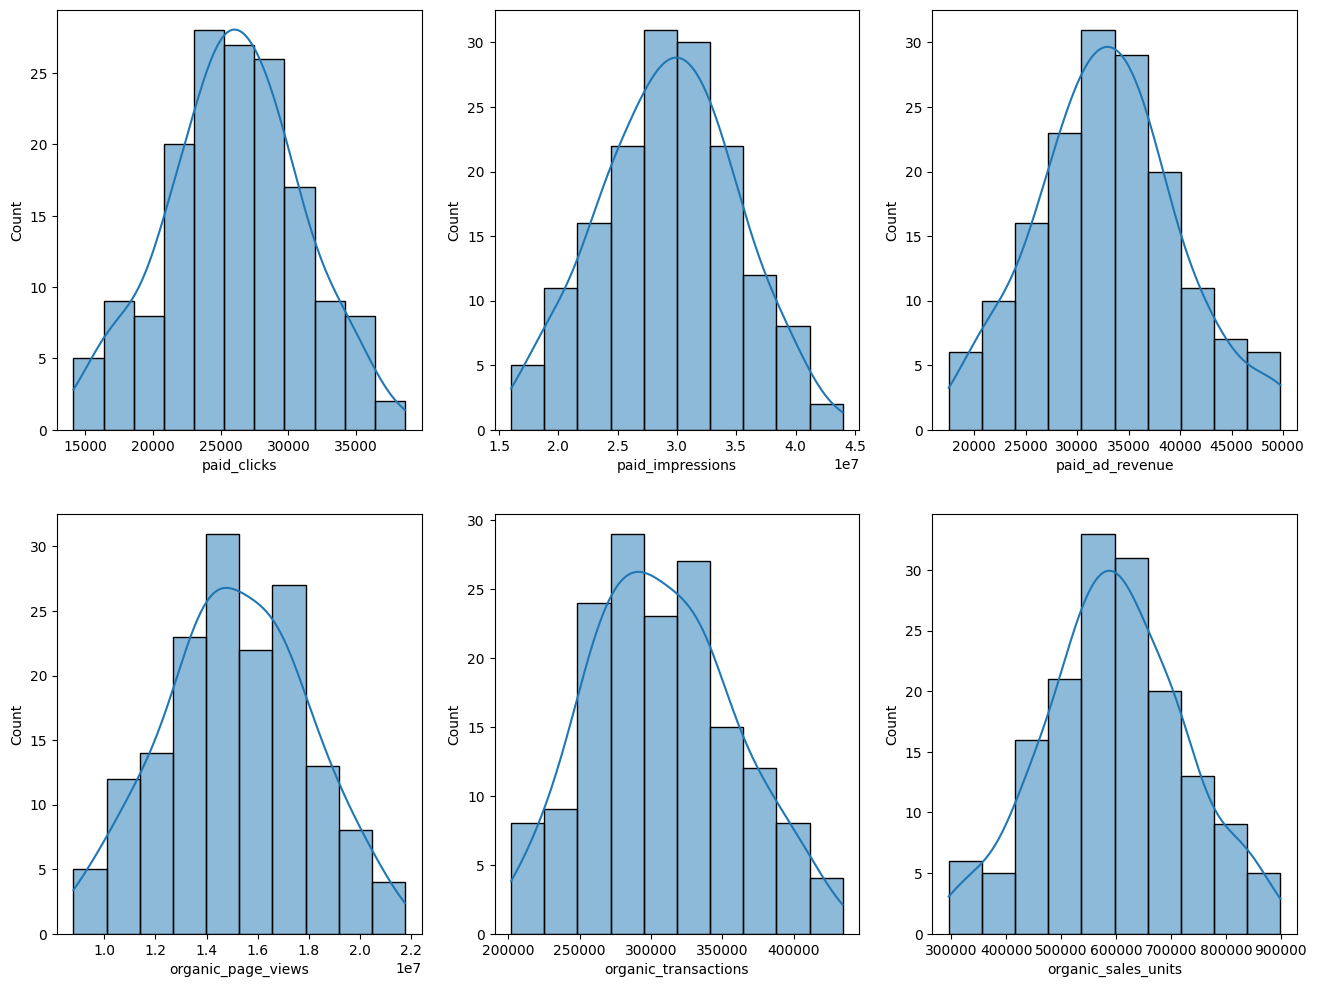

In [ ]:
num_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.histplot(data[num_cols[index]], ax=axis[rows,cols],kde=True)
    index += 1
plt.show

<Axes: xlabel='organic_sales_revenue', ylabel='Count'>

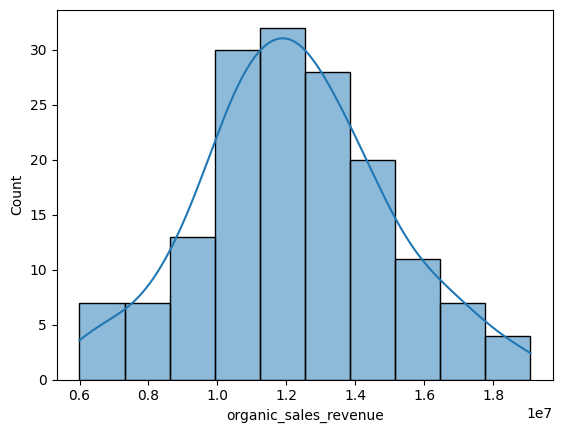

In [ ]:
sns.histplot(data=data[num_cols[-1]],kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

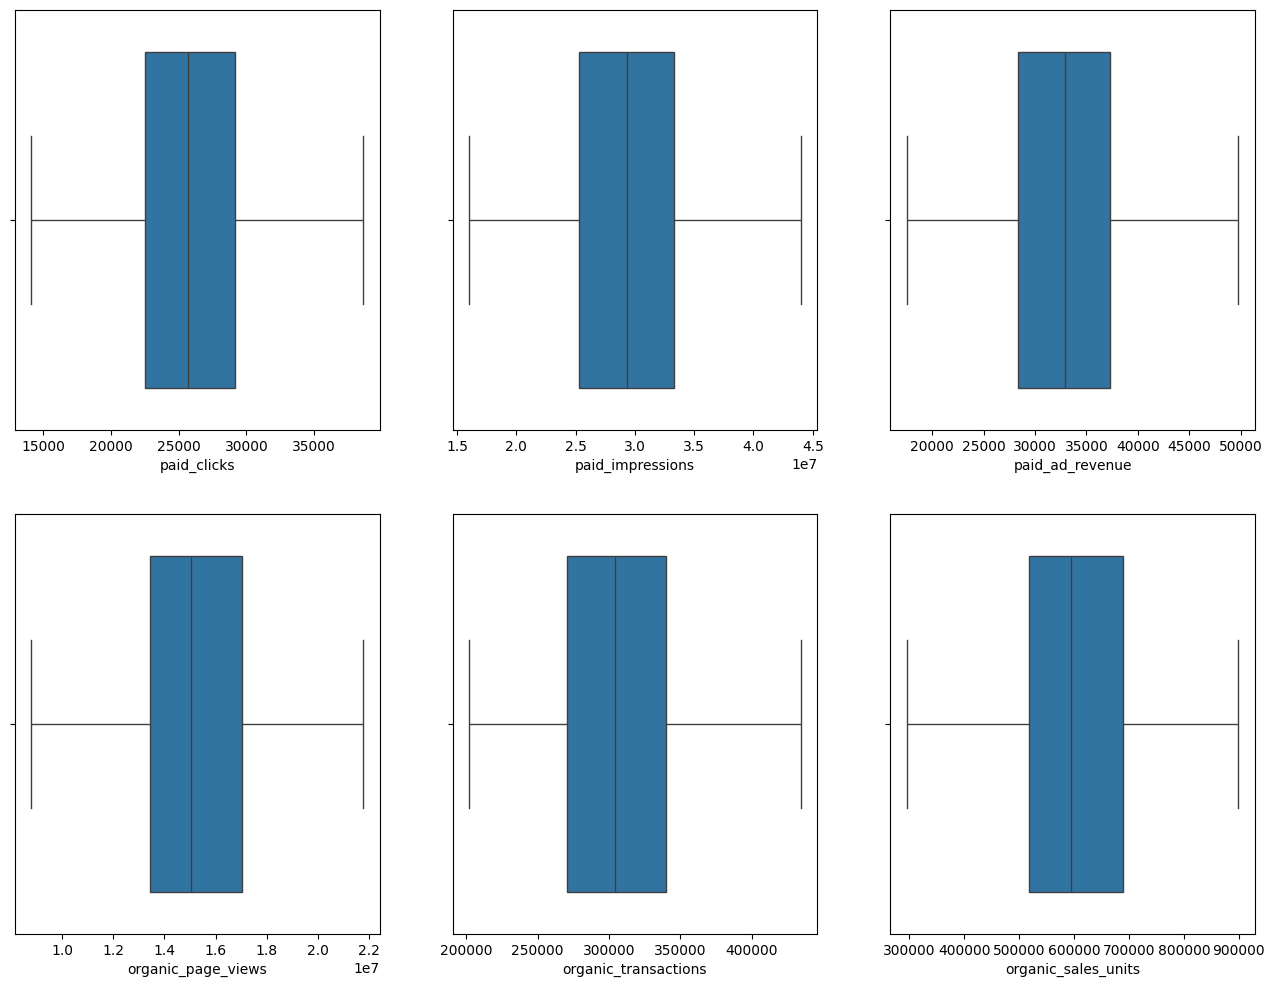

In [ ]:
num_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.boxplot(data[num_cols[index]], ax=axis[rows,cols],orient='h')
    index += 1
plt.show

<Axes: xlabel='organic_sales_revenue'>

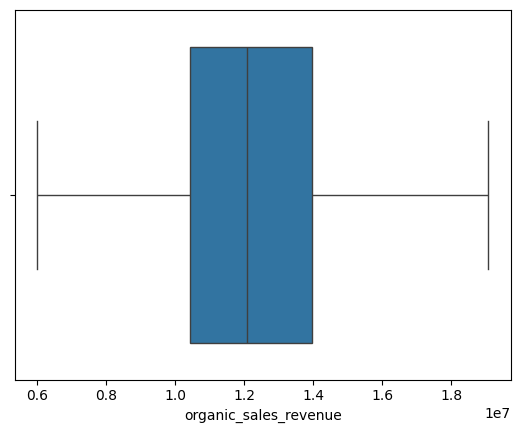

In [ ]:
sns.boxplot(data=data[num_cols[-1]],orient='h')

# Description of Data

In [ ]:
num_cols = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue']

# Select only the numeric columns
numeric_data = data[num_cols]

# Display the description of all numeric columns
description = numeric_data.describe()
print(description)


        paid_clicks  paid_impressions  paid_ad_revenue  organic_page_views  \
count    159.000000      1.590000e+02       159.000000        1.590000e+02   
mean   25957.427673      2.928680e+07     33011.452830        1.515374e+07   
std     4924.473980      5.695958e+06      6855.702466        2.784842e+06   
min    14144.000000      1.602014e+07     17541.000000        8.802887e+06   
25%    22553.500000      2.527747e+07     28345.500000        1.345336e+07   
50%    25729.000000      2.936127e+07     32868.000000        1.503558e+07   
75%    29167.000000      3.327835e+07     37258.500000        1.702981e+07   
max    38601.000000      4.397613e+07     49742.000000        2.175600e+07   

       organic_transactions  organic_sales_units  organic_sales_revenue  
count            159.000000           159.000000           1.590000e+02  
mean          307429.660377        596923.264151           1.221018e+07  
std            50385.714819        126164.313149           2.696314e+06  
m

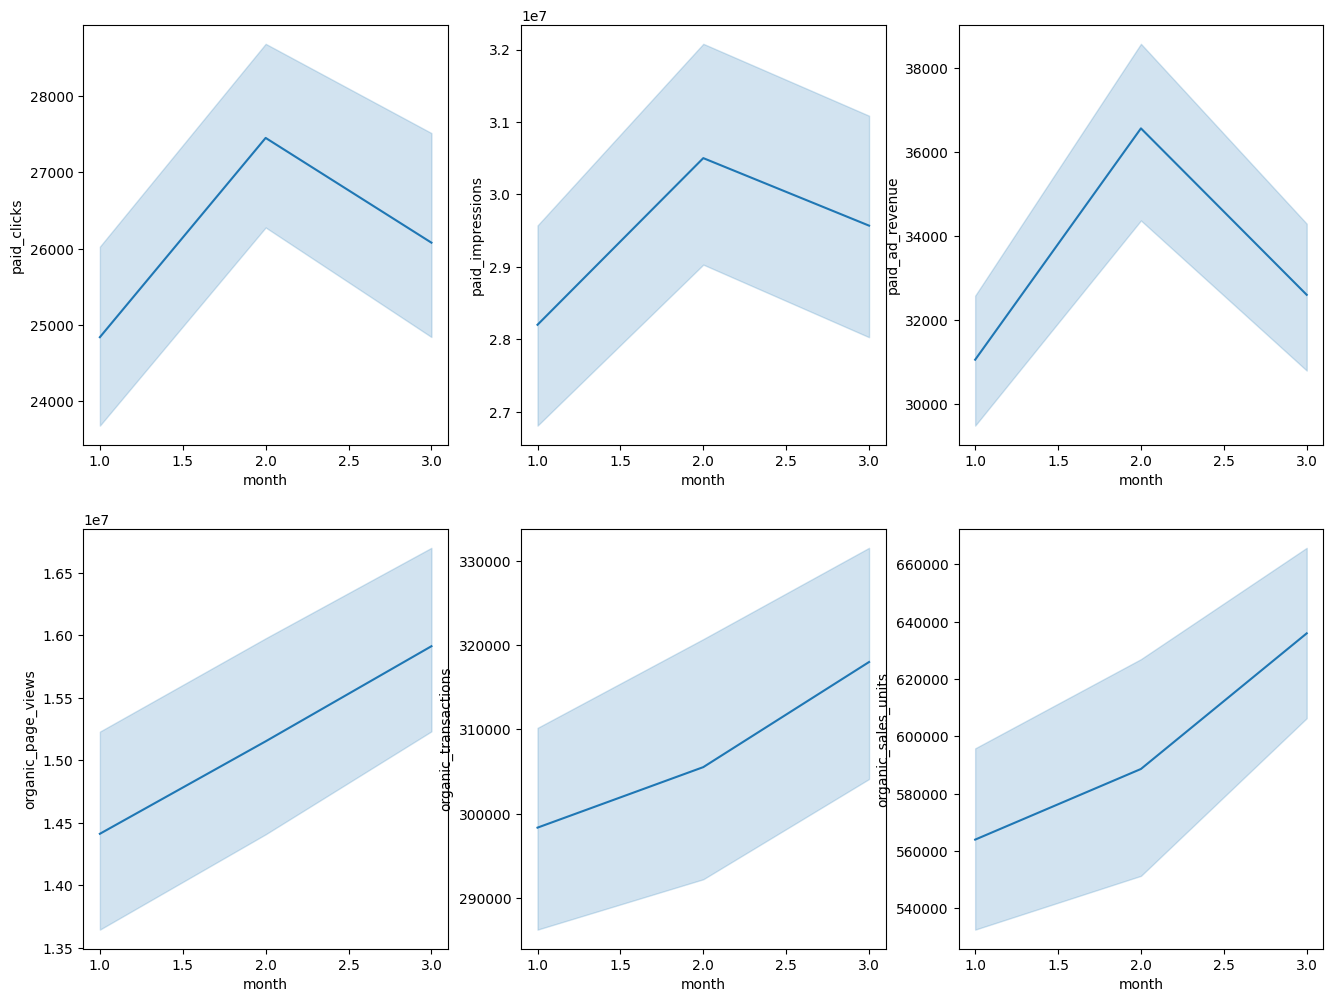

In [ ]:
cat_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.lineplot(data=data,x= 'month', y=cat_cols[index],ax = axis[rows,cols])
    index += 1
plt.show()

<Axes: xlabel='month', ylabel='organic_sales_revenue'>

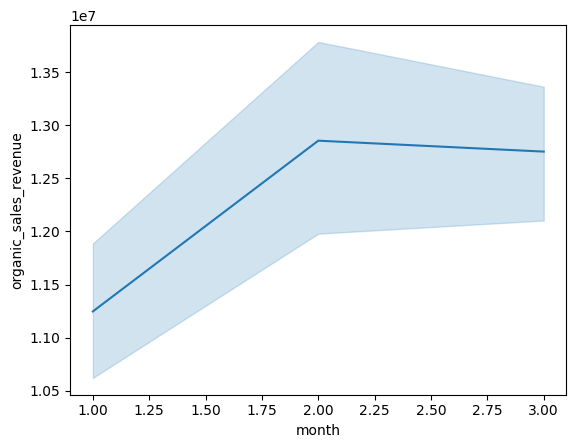

In [ ]:
sns.lineplot(data=data,x= 'month', y=cat_cols[-1])

# Bivariate Analysis

<Axes: xlabel='paid_impressions', ylabel='paid_clicks'>

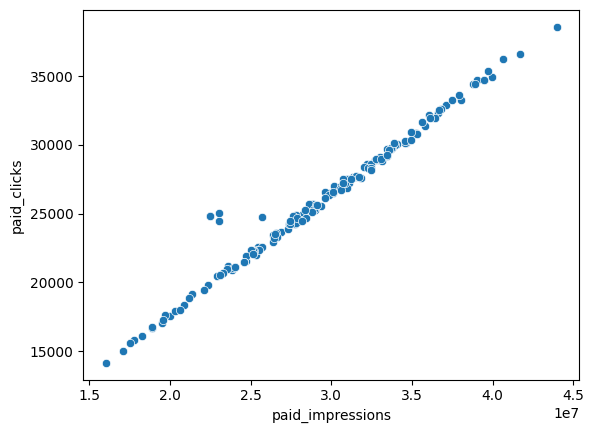

In [ ]:
sns.scatterplot(data=data,x='paid_impressions',y='paid_clicks')

<Axes: xlabel='paid_impressions', ylabel='paid_ad_revenue'>

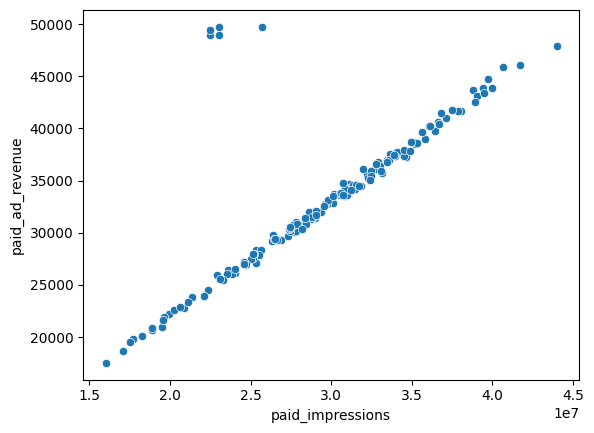

In [ ]:
sns.scatterplot(data=data,x='paid_impressions',y='paid_ad_revenue')

<Axes: xlabel='paid_clicks', ylabel='paid_ad_revenue'>

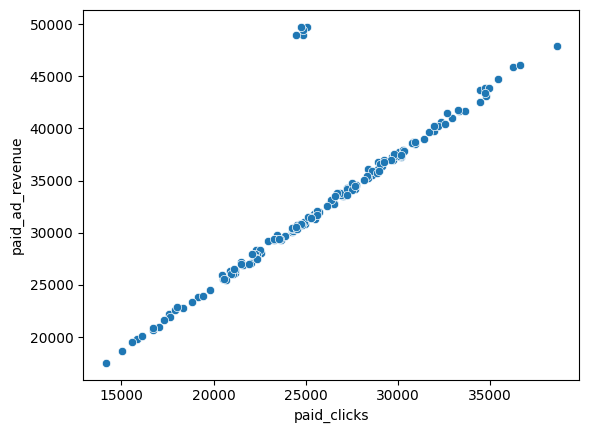

In [ ]:
sns.scatterplot(data=data,x='paid_clicks',y='paid_ad_revenue')

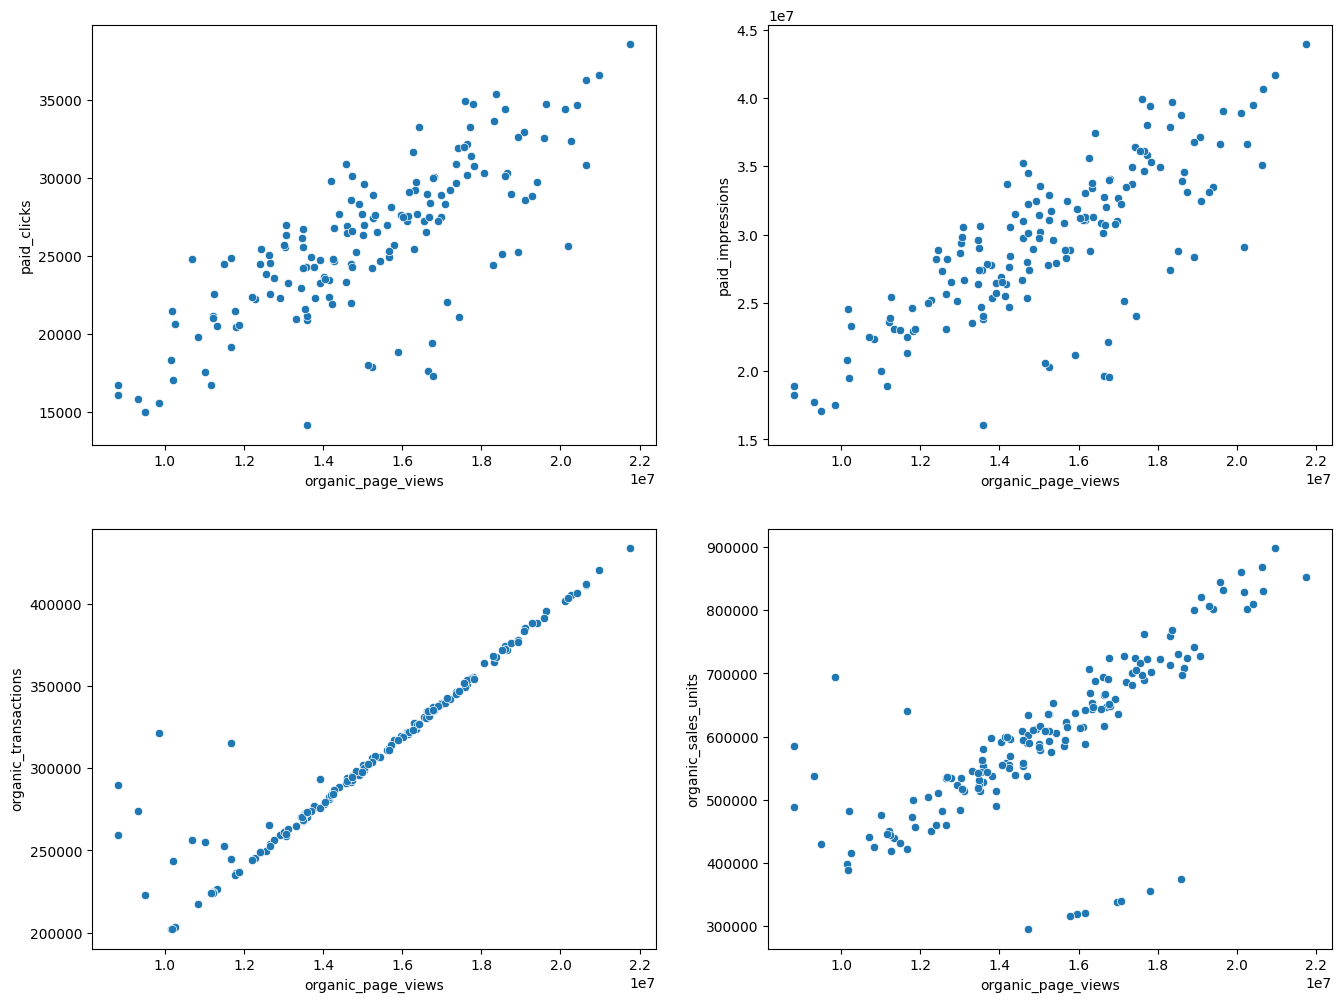

In [ ]:
cat_cols = ['paid_clicks','paid_impressions','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(2):
    sns.scatterplot(data=data,x= 'organic_page_views', y=cat_cols[index],ax = axis[rows,cols])
    index += 1
plt.show()

<Axes: xlabel='organic_page_views', ylabel='organic_sales_revenue'>

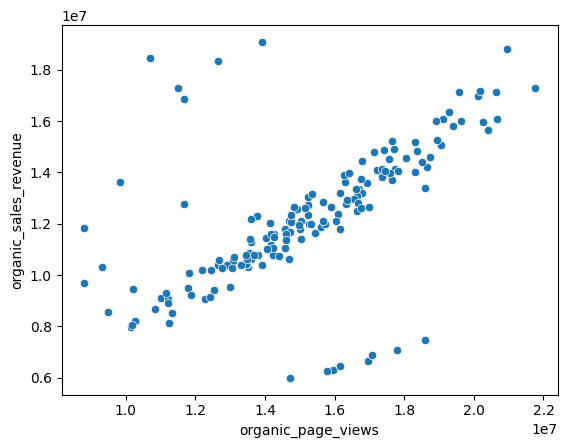

In [ ]:
sns.scatterplot(data=data,x= 'organic_page_views', y=cat_cols[-1])

# Multivariate Analysis

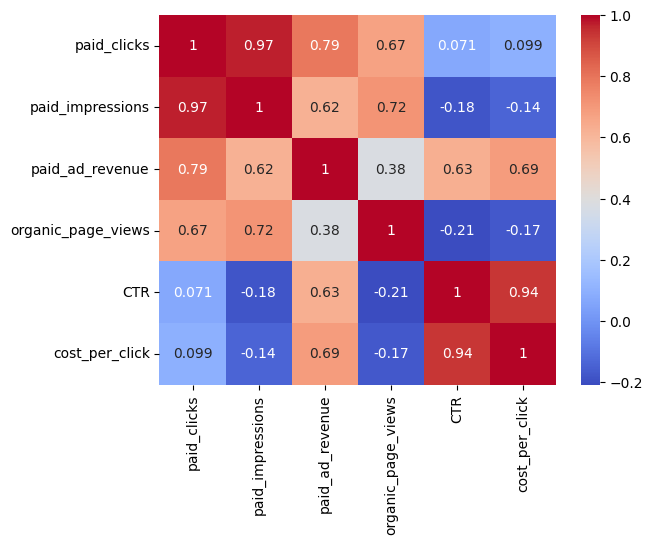

In [ ]:
data_B = data[data['retailer']=='B']
data_A = data[data['retailer']=='A']
selected_columns = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views','CTR','cost_per_click']
figsize=(20,12)
correlation_data_B = data_B[selected_columns]
sns.heatmap(correlation_data_B.corr(),annot=True,cmap='coolwarm')
plt.show()

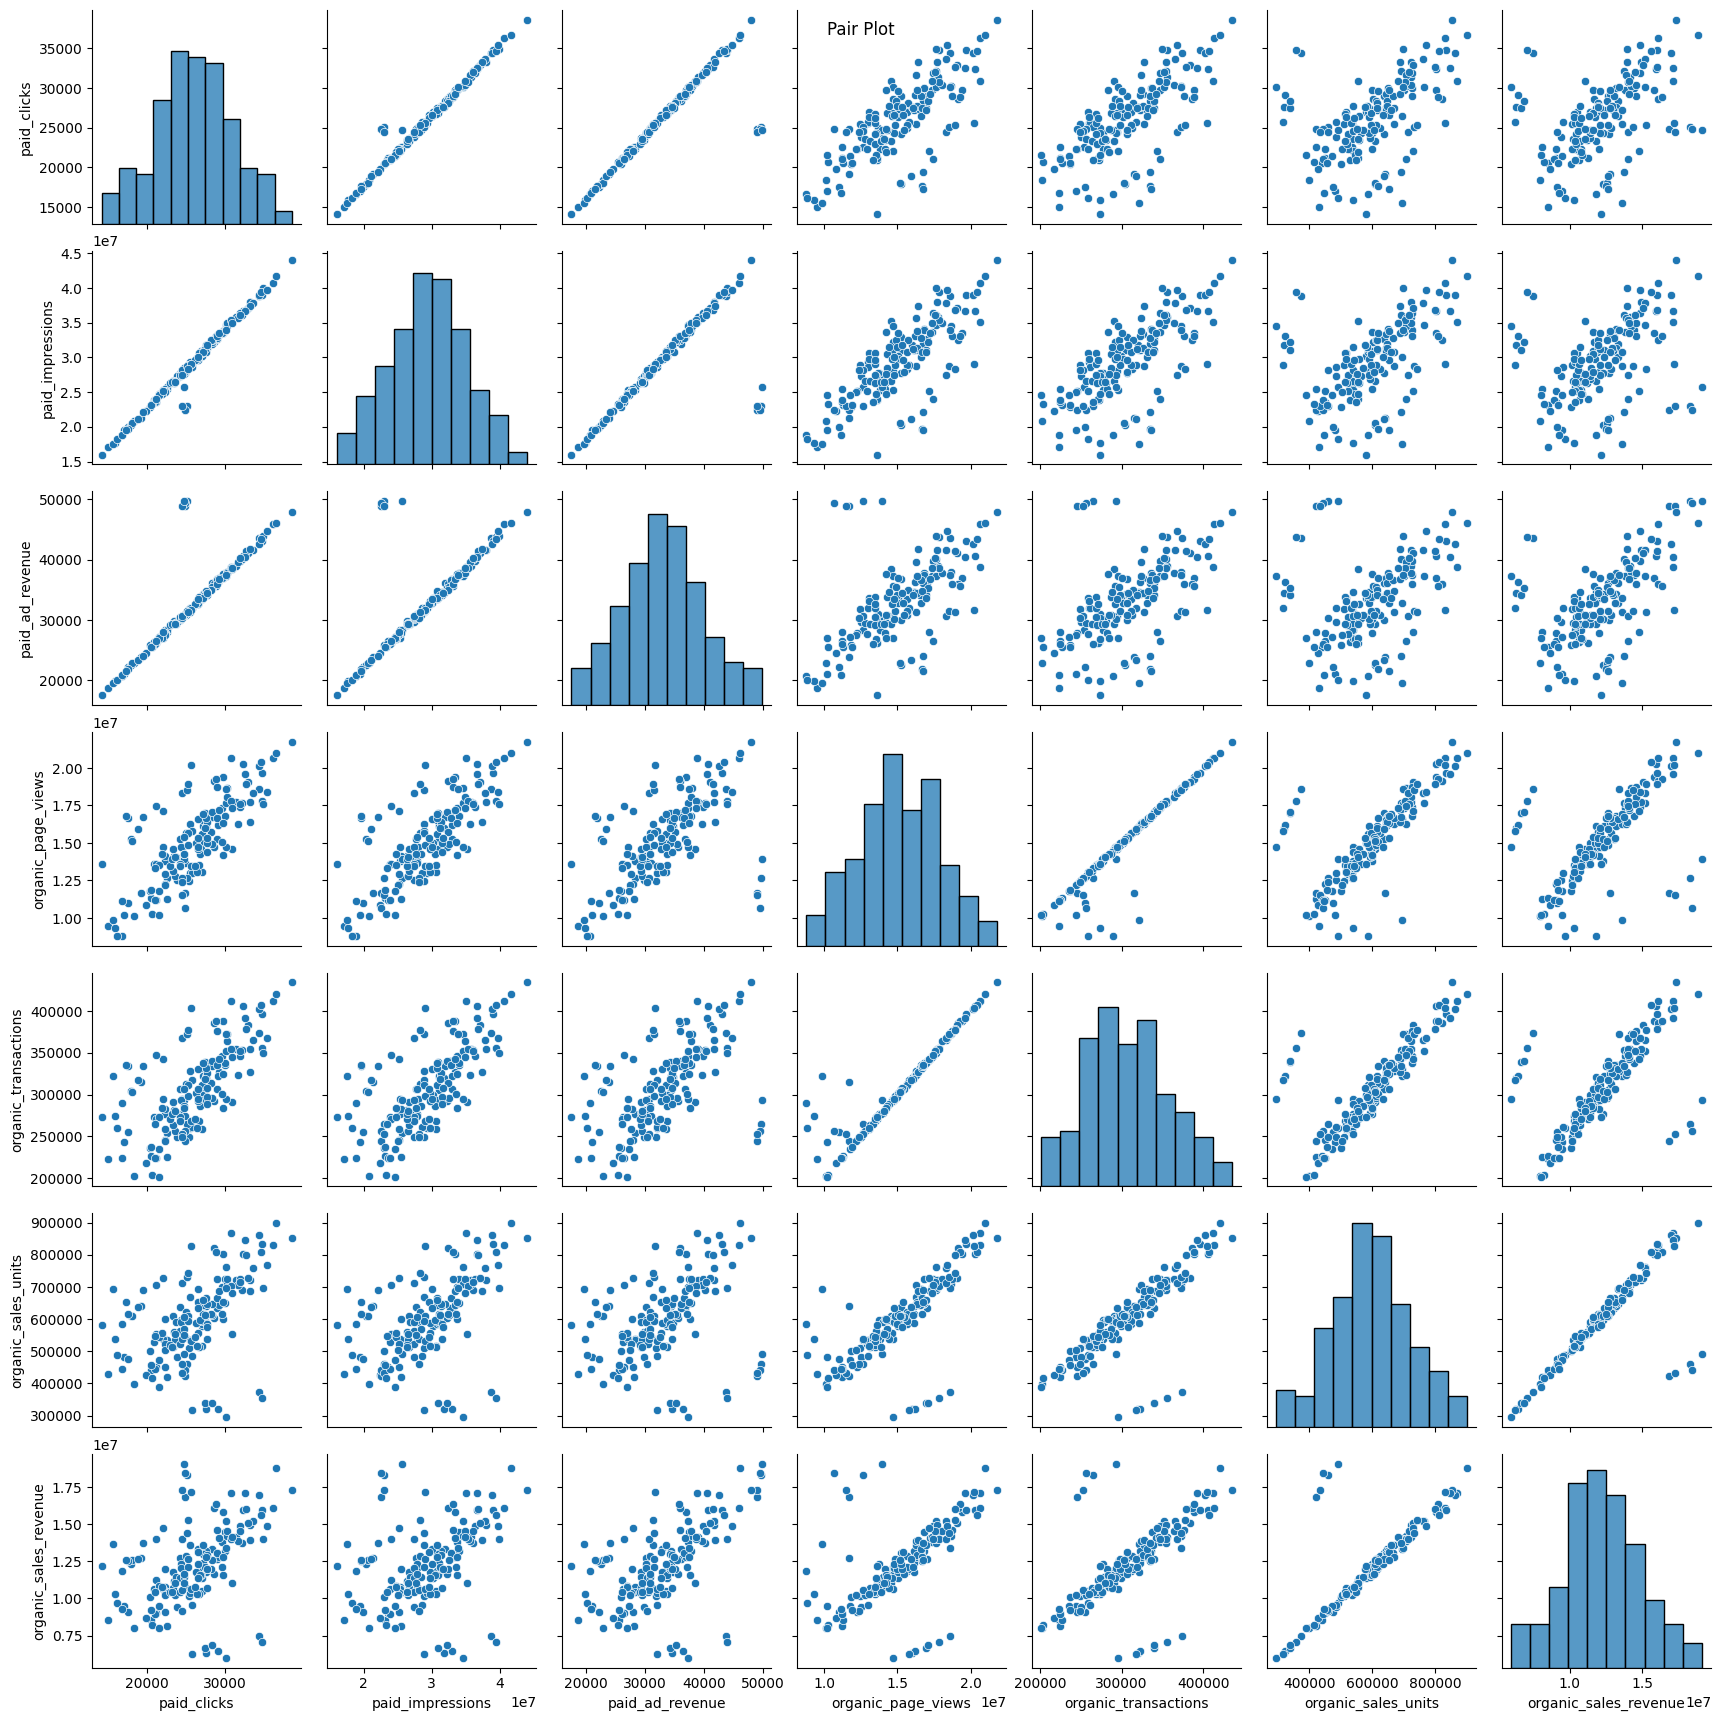

In [ ]:
selected_columns = [ 'paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views', 'organic_transactions', 'organic_sales_units','organic_sales_revenue']
pair_plot_data = data[selected_columns]

# Create pair plot
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot')
plt.show()

# Feature Engineering

In [ ]:
data['day'] = data['date'].dt.day
data['year'] = data['date'].dt.year

In [ ]:
data['CTR'] = (data['paid_clicks'] / data['paid_impressions'])*100
data['conversion_rate_pct'] = (data['organic_transactions'] / data['organic_page_views'])*100
data['cost_per_click'] = data['paid_ad_revenue'] / data['paid_clicks']
data['paid_ad_revenue_share'] = data['paid_ad_revenue'] / data.groupby('retailer')['paid_ad_revenue'].transform('sum')
data['organic_revenue_share_by_retailer'] = data['organic_sales_revenue'] / data.groupby('retailer')['organic_sales_revenue'].transform('sum')
data['day_of_week'] = data['date'].dt.day_of_week
data['cumulative_organic_page_views'] = data.sort_values('date').groupby('retailer')['organic_page_views'].cumsum()
data['cumulative_paid_clicks'] = data.sort_values('date').groupby('retailer')['paid_clicks'].cumsum()
data['cumulative_paid_ad_revenue'] = data.sort_values('date').groupby('retailer')['paid_ad_revenue'].cumsum()
data['revenue_per_organic_sale'] = data['organic_sales_revenue'] / data['organic_sales_units']
data['paid_impressions_per_organic_page'] = data['paid_impressions'] / data['organic_page_views']
data['cumulative_paid_impressions'] = data.sort_values('date').groupby('retailer')['paid_impressions'].cumsum()
data['cumulative_organic_sales_revenue'] = data.sort_values('date').groupby('retailer')['organic_sales_revenue'].cumsum()

In [ ]:
data['cumulative_paid_clicks'] = data.sort_values('date').groupby('retailer')['paid_clicks'].cumsum()

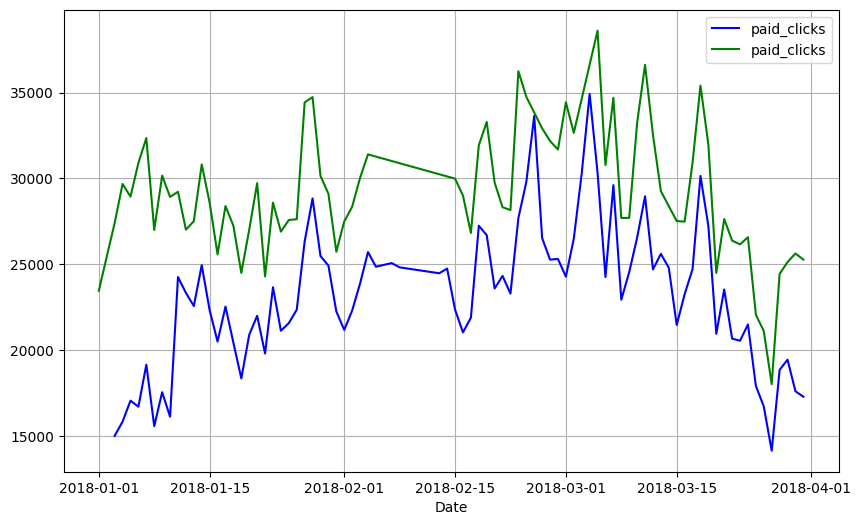

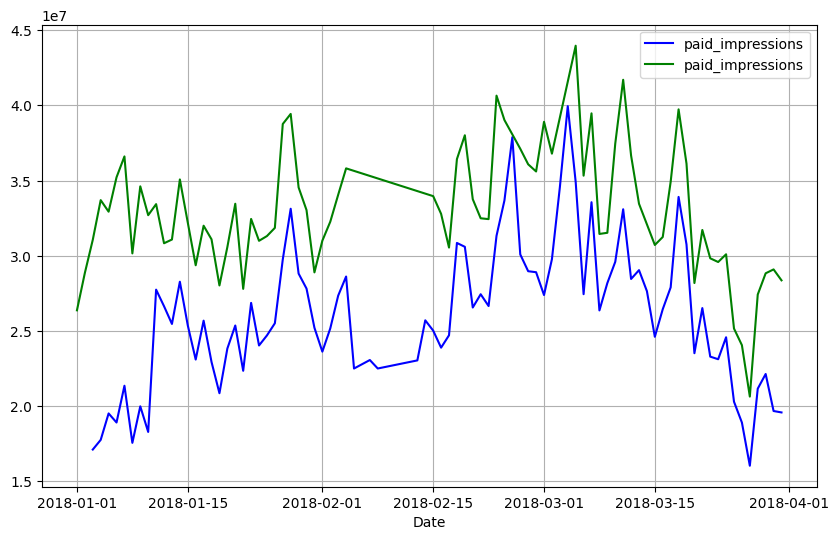

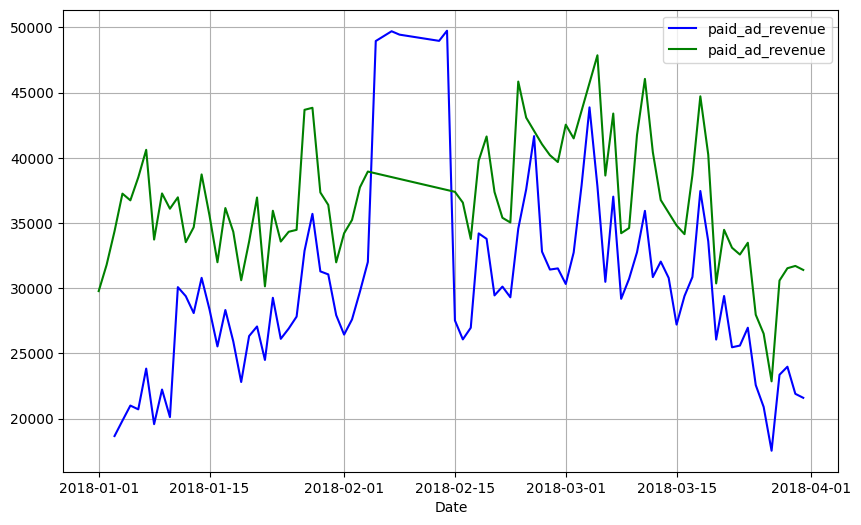

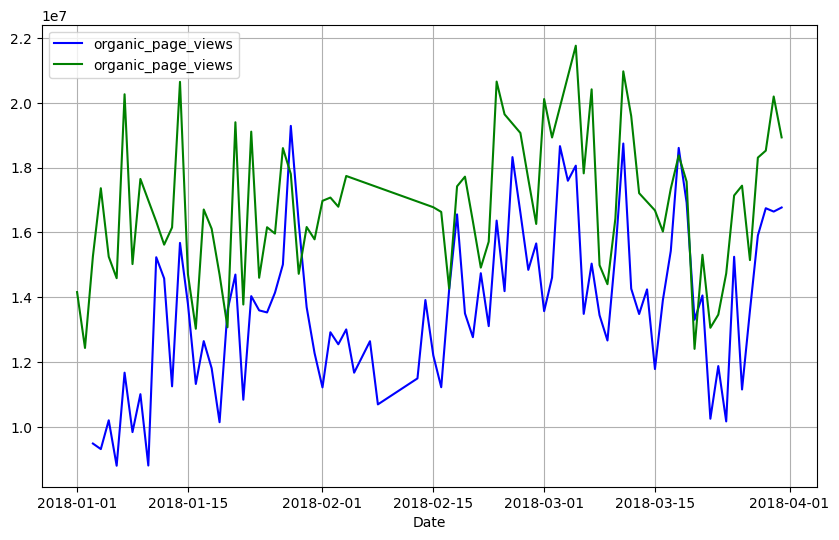

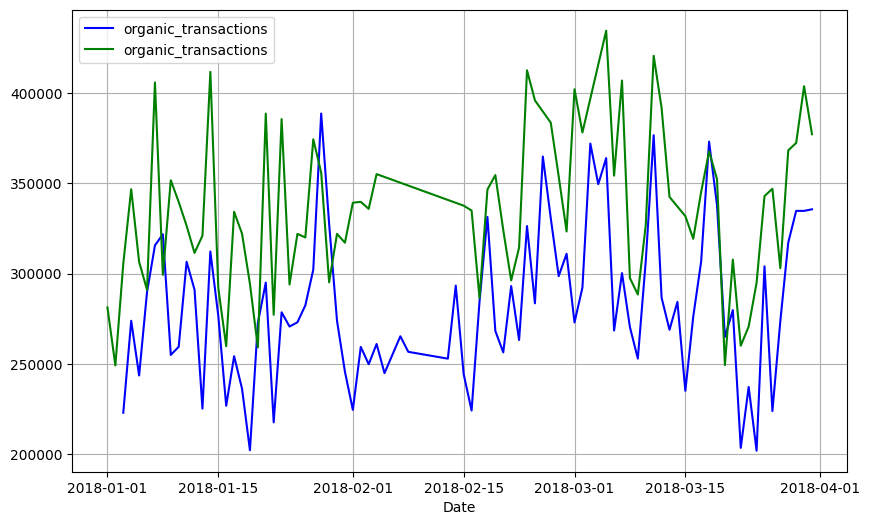

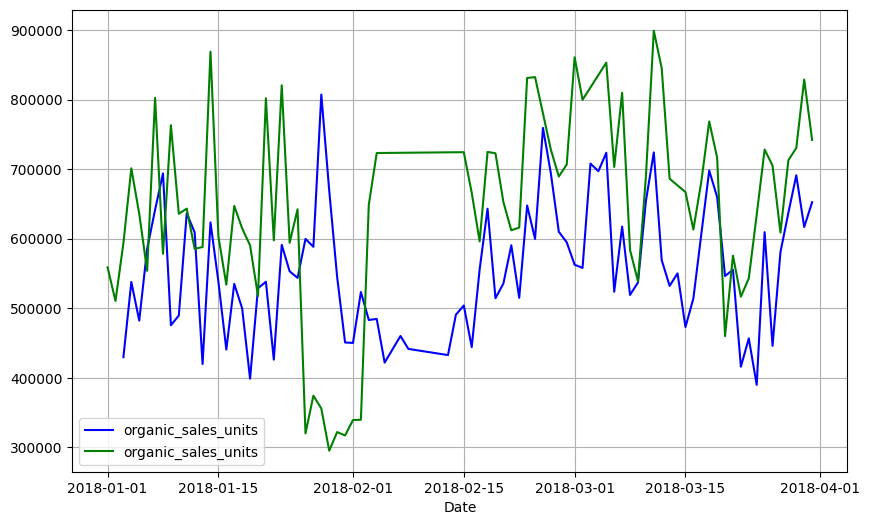

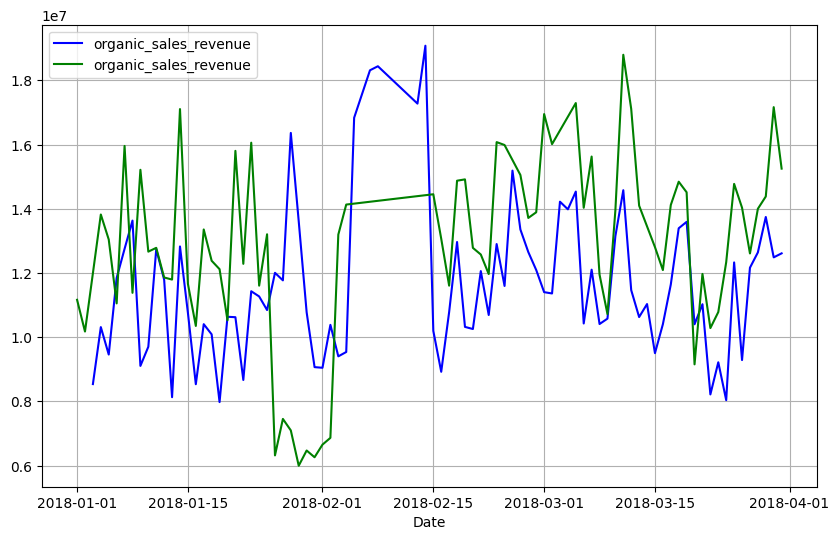

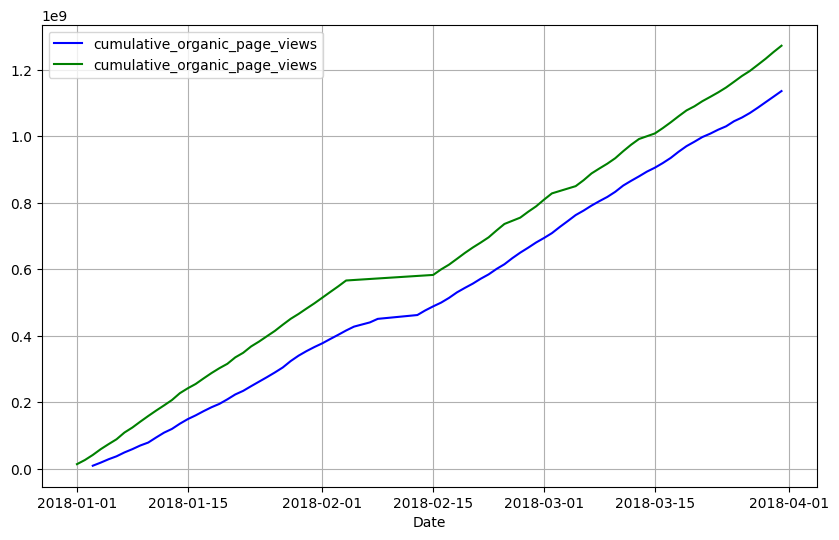

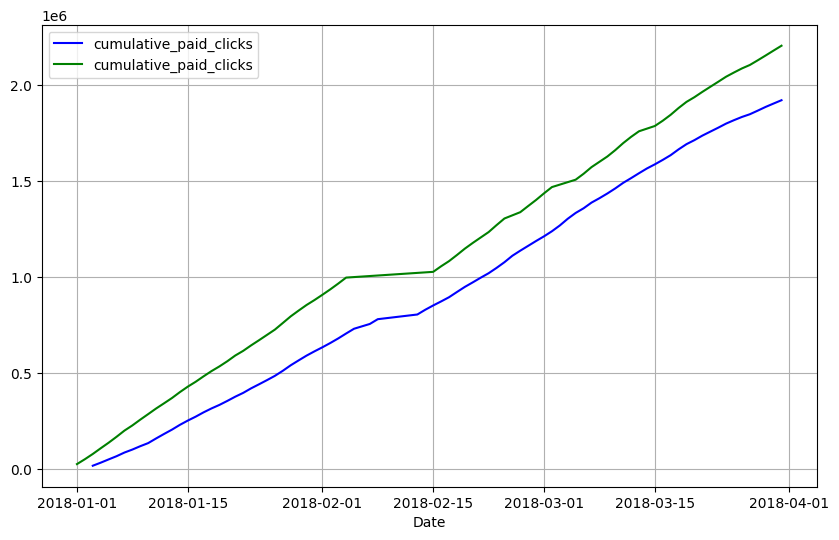

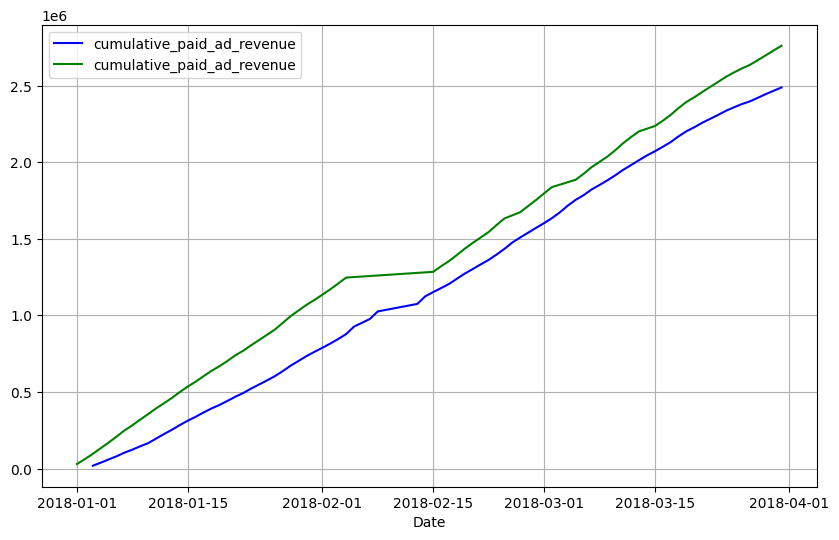

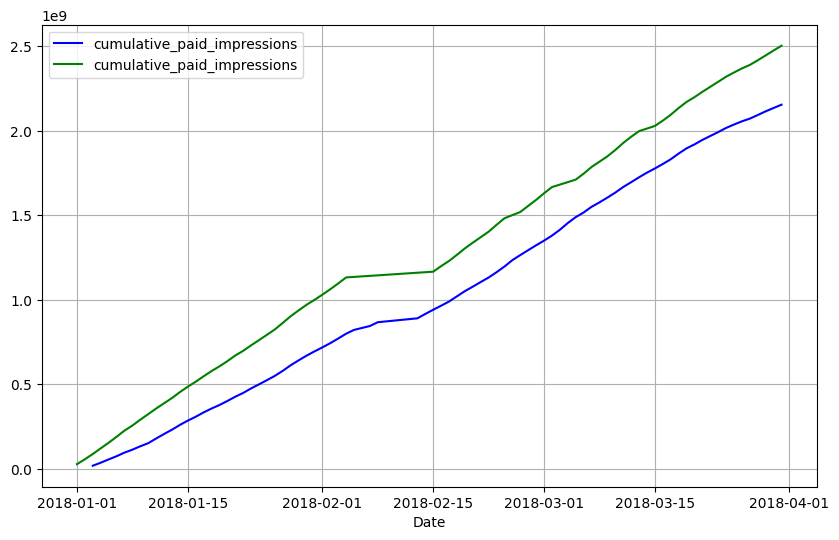

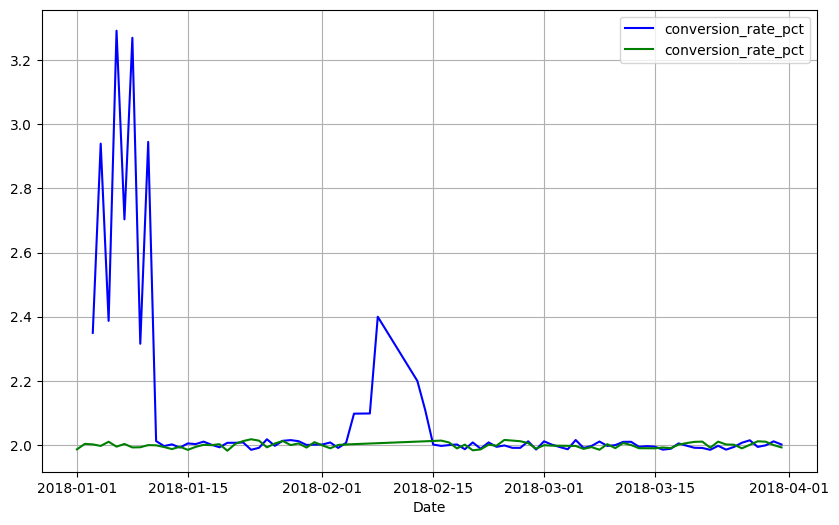

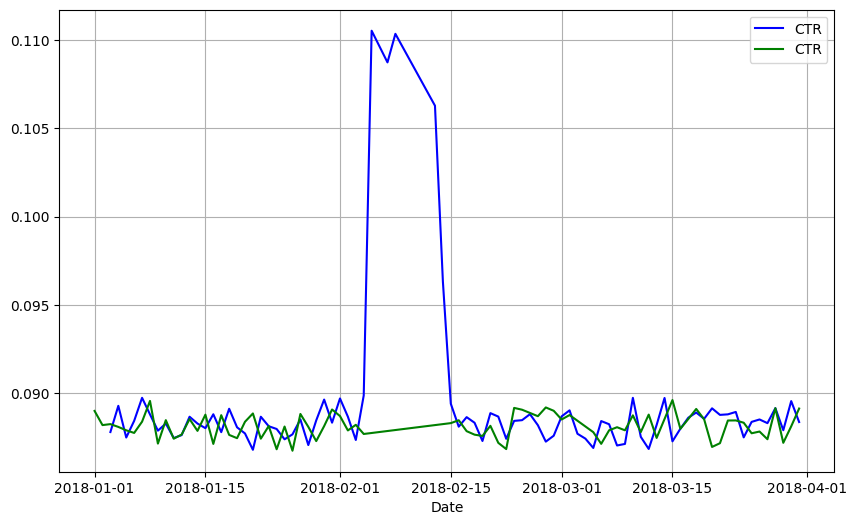

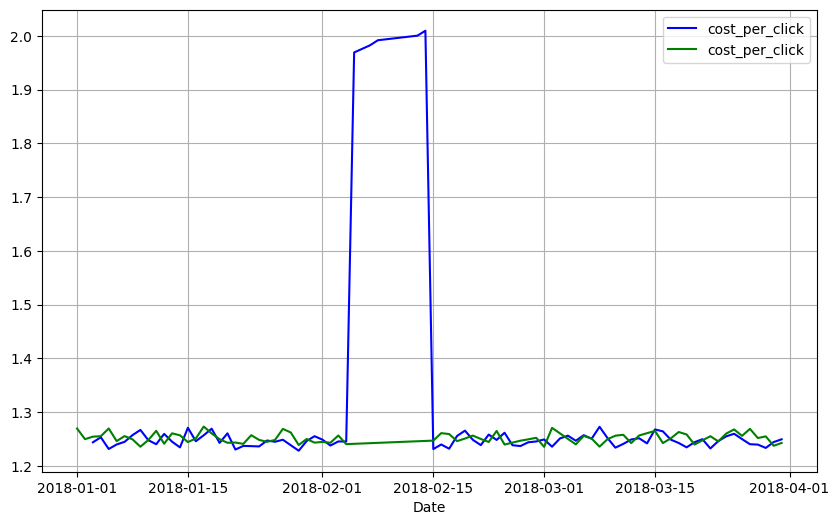

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data_B = data[data['retailer']=='B']
data_A = data[data['retailer']=='A']
num_cols = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue','cumulative_organic_page_views','cumulative_paid_clicks','cumulative_paid_ad_revenue','cumulative_paid_impressions','conversion_rate_pct','CTR','cost_per_click']

data_B = data_B.sort_values('date')
data_A = data_A.sort_values('date')
for cols in num_cols:

  plt.figure(figsize=(10, 6))
  plt.plot(data_B['date'], data_B[cols], label=cols, color='blue')
  plt.plot(data_A['date'], data_A[cols], label=cols, color='green')

  plt.xlabel('Date')
  plt.legend()
  plt.grid(True)
  plt.show()

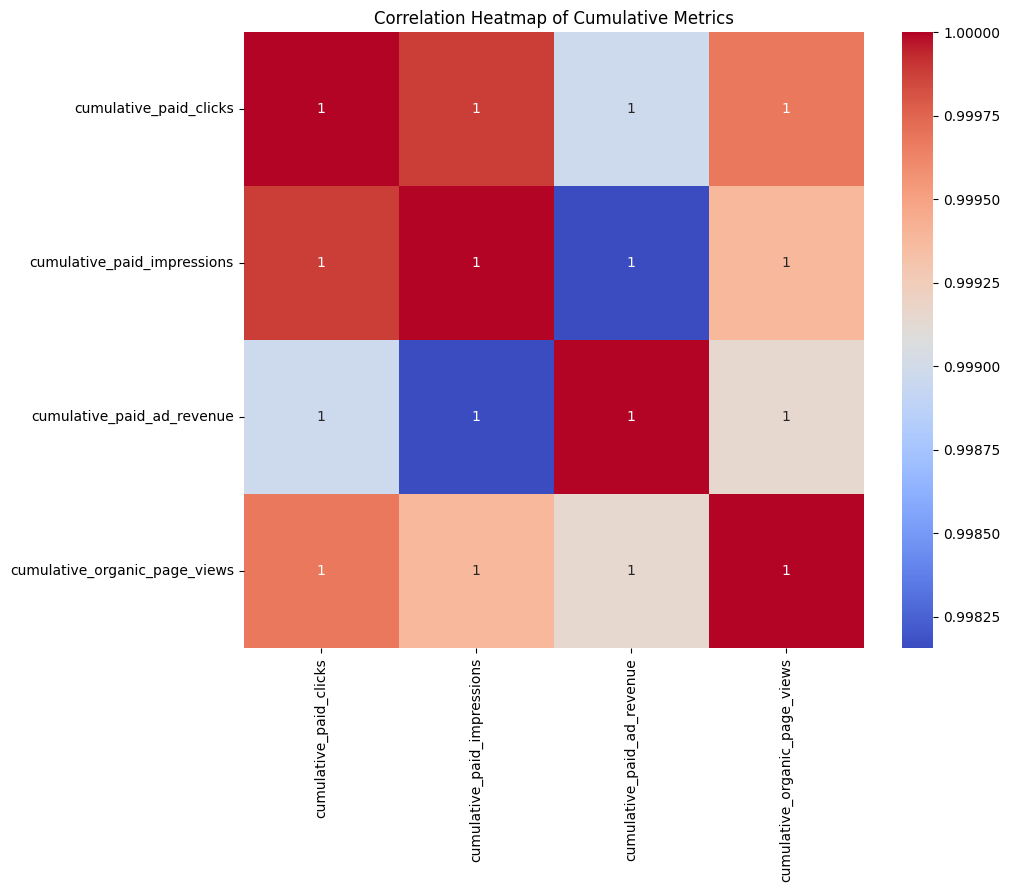

In [ ]:
# Sort the DataFrame by date
data = data.sort_values('date')

cumulative_metrics = ['cumulative_paid_clicks', 'cumulative_paid_impressions', 'cumulative_paid_ad_revenue', 'cumulative_organic_page_views']

correlation_df = data[cumulative_metrics]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Cumulative Metrics')
plt.show()

In [ ]:
data = data.sort_values('date')

cumulative_metrics = ['cumulative_paid_clicks', 'cumulative_paid_impressions', 'cumulative_paid_ad_revenue', 'cumulative_organic_page_views']

correlation_df = data[cumulative_metrics]

correlation_matrix = correlation_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                               cumulative_paid_clicks  \
cumulative_paid_clicks                       1.000000   
cumulative_paid_impressions                  0.999881   
cumulative_paid_ad_revenue                   0.998972   
cumulative_organic_page_views                0.999682   

                               cumulative_paid_impressions  \
cumulative_paid_clicks                            0.999881   
cumulative_paid_impressions                       1.000000   
cumulative_paid_ad_revenue                        0.998155   
cumulative_organic_page_views                     0.999381   

                               cumulative_paid_ad_revenue  \
cumulative_paid_clicks                           0.998972   
cumulative_paid_impressions                      0.998155   
cumulative_paid_ad_revenue                       1.000000   
cumulative_organic_page_views                    0.999147   

                               cumulative_organic_page_views  
cumulative_pai

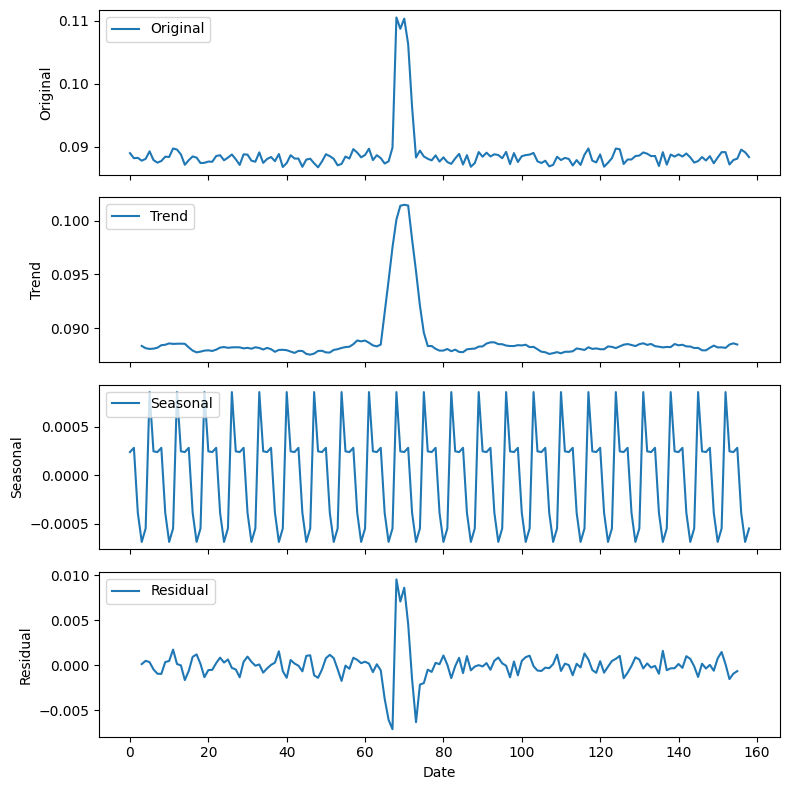

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'CTR'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

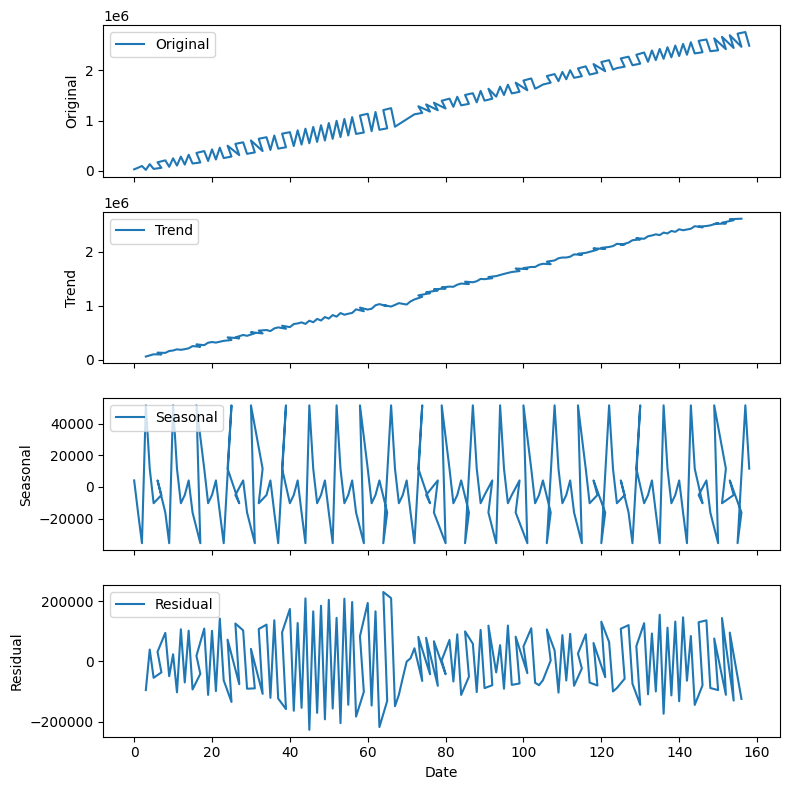

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'cumulative_paid_ad_revenue'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

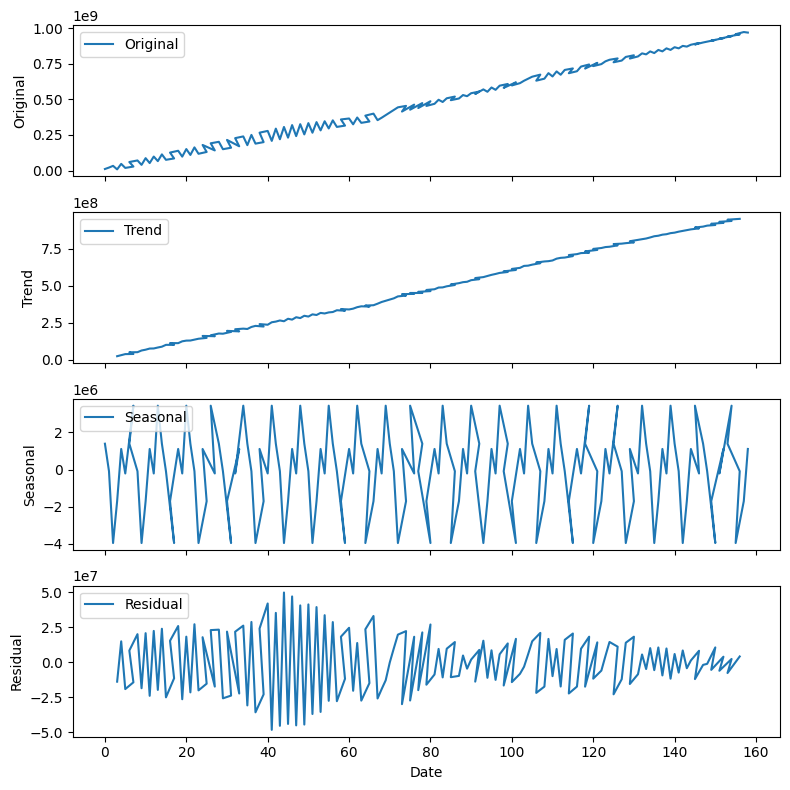

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'cumulative_organic_sales_revenue'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['date', 'retailer', 'paid_clicks', 'paid_impressions',
       'paid_ad_revenue', 'organic_page_views', 'organic_transactions',
       'organic_sales_units', 'organic_sales_revenue', 'month',
       'clicks_per_impression', 'conversion_rate', 'lagged_paid_ad_revenue',
       'binned_organic_page_views', 'cost_per_click', 'paid_ad_revenue_share',
       'organic_revenue_share_by_retailer', 'day_of_week', 'hour_of_day',
       'cumulative_organic_page_views', 'cumulative_paid_clicks',
       'cumulative_paid_ad_revenue', 'revenue_per_organic_sale',
       'paid_impressions_per_organic_page', 'clicks_per_transaction',
       'cumulative_paid_impressions', 'organic_sales_revenue_bins'],
      dtype='object')

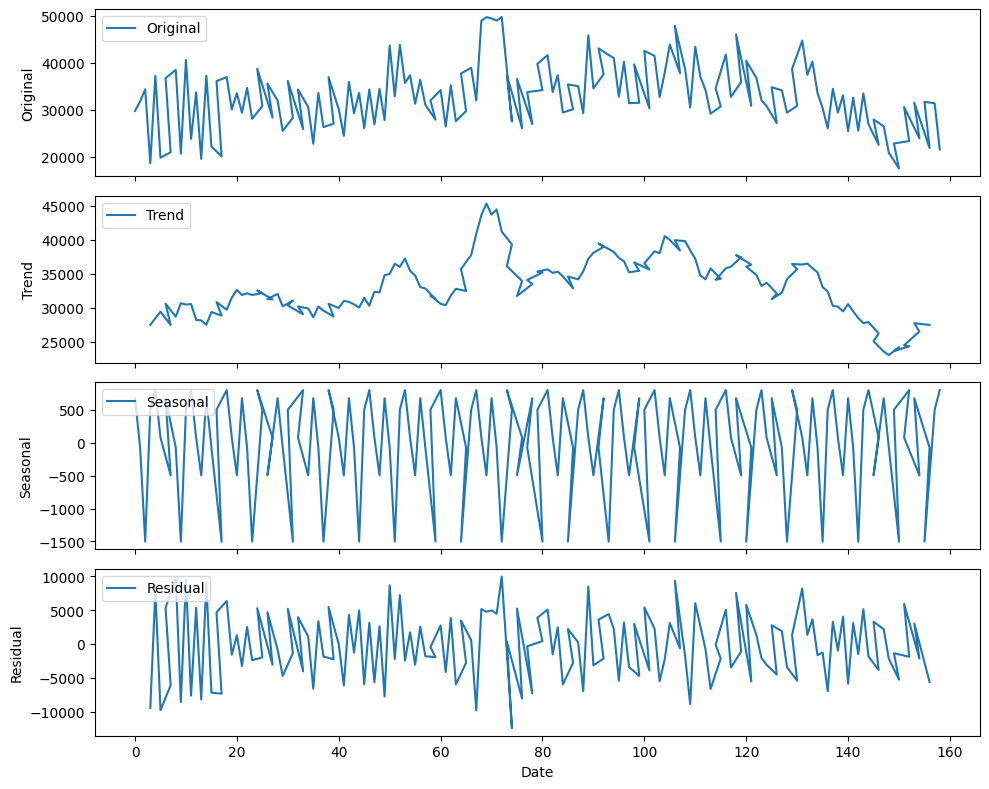

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'paid_ad_revenue'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

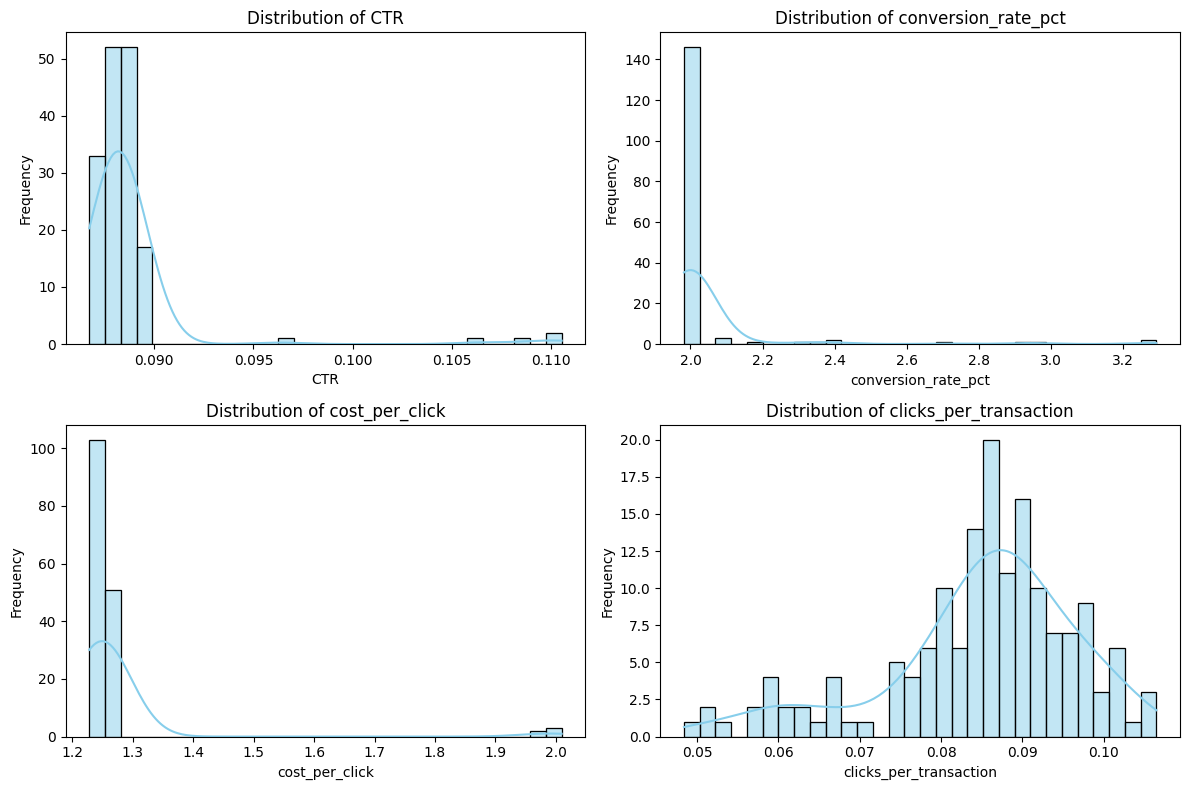

In [ ]:
metrics_to_plot = ['CTR', 'conversion_rate_pct', 'cost_per_click', "clicks_per_transaction"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[metric], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
cpc_data = data['cost_per_click']

mean_cpc = cpc_data.mean()
median_cpc = cpc_data.median()
std_dev_cpc = cpc_data.std()

print(f"Mean CPC: {mean_cpc}")
print(f"Median CPC: {median_cpc}")
print(f"Standard Deviation CPC: {std_dev_cpc}")

Mean CPC: 1.272572325995441
Median CPC: 1.2486746792926227
Standard Deviation CPC: 0.1302188596789187


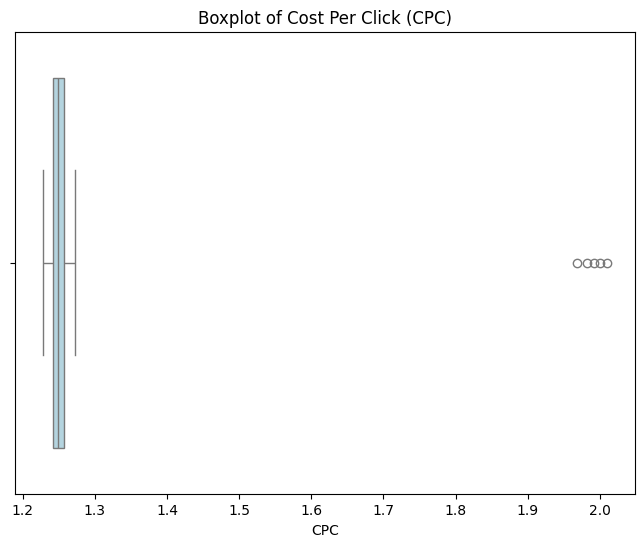

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cpc_data, color='lightblue')
plt.title('Boxplot of Cost Per Click (CPC)')
plt.xlabel('CPC')
plt.show()

In [ ]:
quantiles = [0.25, 0.5, 0.75]
cpc_quantiles = cpc_data.quantile(quantiles)

for q, value in zip(quantiles, cpc_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

25th Percentile: 1.242490625642926
50th Percentile: 1.2486746792926227
75th Percentile: 1.2567767617102672


In [ ]:
q1 = cpc_data.quantile(0.25)
q3 = cpc_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = cpc_data[(cpc_data < lower_bound) | (cpc_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
date
2018-02-05    1.969146
2018-02-07    1.982489
2018-02-08    1.991902
2018-02-13    2.000449
2018-02-14    2.009615
Name: cost_per_click, dtype: float64


In [ ]:
np.mean(outliers)

1.9907203637213027

In [ ]:
df_with_retailer = data[['cost_per_click', 'retailer']]

q1 = df_with_retailer['cost_per_click'].quantile(0.25)
q3 = df_with_retailer['cost_per_click'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_with_retailer[(df_with_retailer['cost_per_click'] < lower_bound) | (df_with_retailer['cost_per_click'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
            cost_per_click retailer
date                               
2018-02-05        1.969146        B
2018-02-07        1.982489        B
2018-02-08        1.991902        B
2018-02-13        2.000449        B
2018-02-14        2.009615        B


Mean CPI: 0.0008876844771698645
Median CPI: 0.0008826471751485882
Standard Deviation CPI: 3.40782733542417e-05


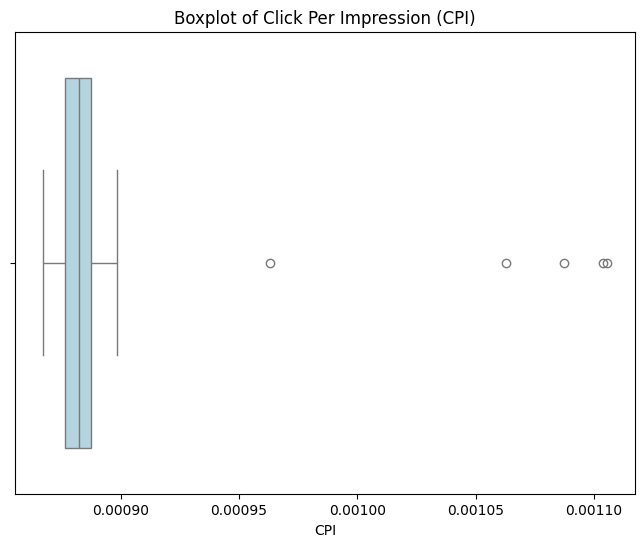

25th Percentile: 0.0008766393631245548
50th Percentile: 0.0008826471751485882
75th Percentile: 0.0008876340535628678
Potential Outliers:
date
2018-02-05    0.001105
2018-02-07    0.001087
2018-02-08    0.001104
2018-02-13    0.001063
2018-02-14    0.000963
Name: clicks_per_impression, dtype: float64


In [ ]:
cpi_data = data['clicks_per_impression']

mean_cpi = cpi_data.mean()
median_cpi = cpi_data.median()
std_dev_cpi = cpi_data.std()

print(f"Mean CPI: {mean_cpi}")
print(f"Median CPI: {median_cpi}")
print(f"Standard Deviation CPI: {std_dev_cpi}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=cpi_data, color='lightblue')
plt.title('Boxplot of Click Per Impression (CPI)')
plt.xlabel('CPI')
plt.show()

quantiles = [0.25, 0.5, 0.75]
cpi_quantiles = cpi_data.quantile(quantiles)

for q, value in zip(quantiles, cpi_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

q1 = cpi_data.quantile(0.25)
q3 = cpi_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = cpi_data[(cpi_data < lower_bound) | (cpi_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

In [ ]:
np.mean(outliers)

0.0010644506988641861

In [ ]:

df_with_retailer = data[['clicks_per_impression', 'retailer']]

q1 = df_with_retailer['clicks_per_impression'].quantile(0.25)
q3 = df_with_retailer['clicks_per_impression'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_with_retailer[(df_with_retailer['clicks_per_impression'] < lower_bound) | (df_with_retailer['clicks_per_impression'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
            clicks_per_impression retailer
date                                      
2018-02-05               0.001105        B
2018-02-07               0.001087        B
2018-02-08               0.001104        B
2018-02-13               0.001063        B
2018-02-14               0.000963        B


Mean conversion_rate: 0.020441457100368644
Median CPI: 0.02000472910886229
Standard Deviation CPI: 0.0019249493213828641


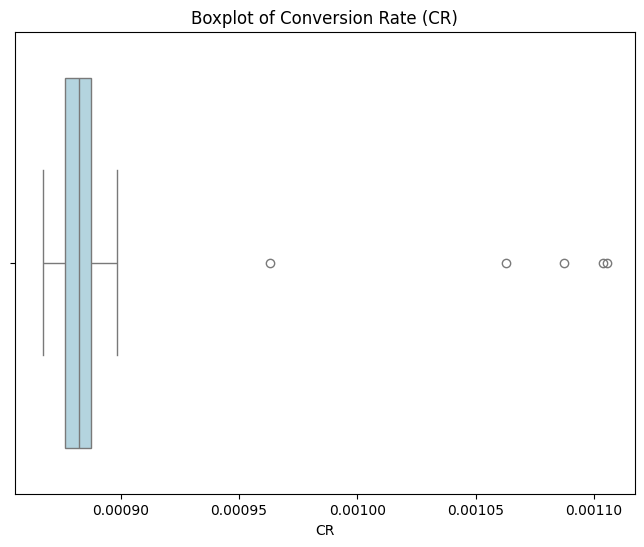

25th Percentile: 0.019926981078106053
50th Percentile: 0.02000472910886229
75th Percentile: 0.02009574293106419
Potential Outliers:
date
2018-01-03    0.023495
2018-01-04    0.029396
2018-01-05    0.023868
2018-01-06    0.032917
2018-01-07    0.027034
2018-01-08    0.032697
2018-01-09    0.023156
2018-01-10    0.029450
2018-02-05    0.020975
2018-02-07    0.020981
2018-02-08    0.023998
2018-02-13    0.021996
2018-02-14    0.021081
Name: conversion_rate, dtype: float64


In [ ]:
conversion_rate_data = data['conversion_rate']

mean_conversion_rate = conversion_rate_data.mean()
median_conversion_rate = conversion_rate_data.median()
std_dev_conversion_rate = conversion_rate_data.std()

print(f"Mean conversion_rate: {mean_conversion_rate}")
print(f"Median CPI: {median_conversion_rate}")
print(f"Standard Deviation CPI: {std_dev_conversion_rate}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=cpi_data, color='lightblue')
plt.title('Boxplot of Conversion Rate (CR)')
plt.xlabel('CR')
plt.show()

quantiles = [0.25, 0.5, 0.75]
cr_quantiles = conversion_rate_data.quantile(quantiles)

for q, value in zip(quantiles, cr_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

q1 = conversion_rate_data.quantile(0.25)
q3 = conversion_rate_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = conversion_rate_data[(conversion_rate_data < lower_bound) | (conversion_rate_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

Mean clicks_per_transaction: 0.08491215484314998
Median clicks_per_transaction: 0.08646955491121505
Standard Deviation clicks_per_transaction: 0.011928583548031224


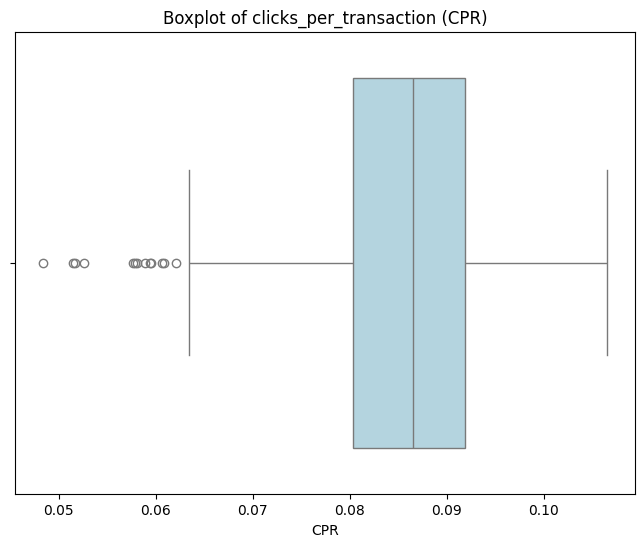

25th Percentile: 0.08038404417377093
50th Percentile: 0.08646955491121505
75th Percentile: 0.09190158384291028
Potential Outliers:
date
2018-01-04    0.057832
2018-01-06    0.057660
2018-01-07    0.060693
2018-01-08    0.048404
2018-01-10    0.062152
2018-03-25    0.058953
2018-03-26    0.060855
2018-03-27    0.059479
2018-03-27    0.051679
2018-03-28    0.059445
2018-03-29    0.058103
2018-03-30    0.052602
2018-03-31    0.051520
Name: clicks_per_transaction, dtype: float64


In [ ]:
clicks_per_transaction_data = data['clicks_per_transaction']

mean_clicks_per_transaction = clicks_per_transaction_data.mean()
median_clicks_per_transaction = clicks_per_transaction_data.median()
std_dev_clicks_per_transaction = clicks_per_transaction_data.std()

print(f"Mean clicks_per_transaction: {mean_clicks_per_transaction}")
print(f"Median clicks_per_transaction: {median_clicks_per_transaction}")
print(f"Standard Deviation clicks_per_transaction: {std_dev_clicks_per_transaction}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=clicks_per_transaction_data, color='lightblue')
plt.title('Boxplot of clicks_per_transaction (CPR)')
plt.xlabel('CPR')
plt.show()

quantiles = [0.25, 0.5, 0.75]
cpr_quantiles = clicks_per_transaction_data.quantile(quantiles)

for q, value in zip(quantiles, cpr_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

q1 = clicks_per_transaction_data.quantile(0.25)
q3 = clicks_per_transaction_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = clicks_per_transaction_data[(clicks_per_transaction_data < lower_bound) | (clicks_per_transaction_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

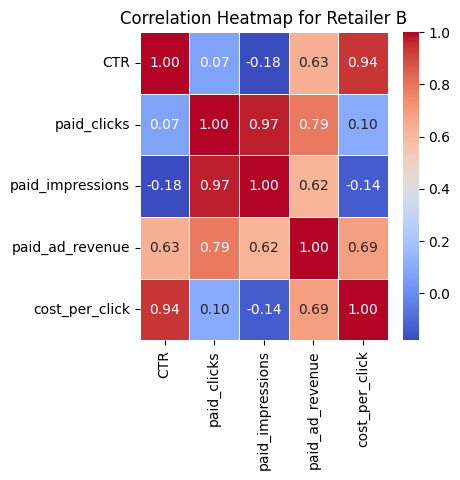

In [ ]:
data_B = data[data['retailer']=='B']
derived_columns = ['CTR','paid_clicks','paid_impressions','paid_ad_revenue','cost_per_click']

selected_data = data_B[derived_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Retailer B')
plt.show()

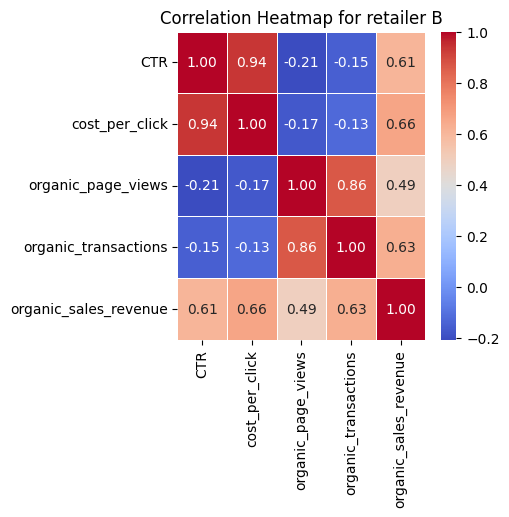

In [ ]:
data_B = data[data['retailer']=='B']
derived_columns = ['CTR','cost_per_click','organic_page_views','organic_transactions','organic_sales_revenue']

selected_data = data_B[derived_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for retailer B')
plt.show()

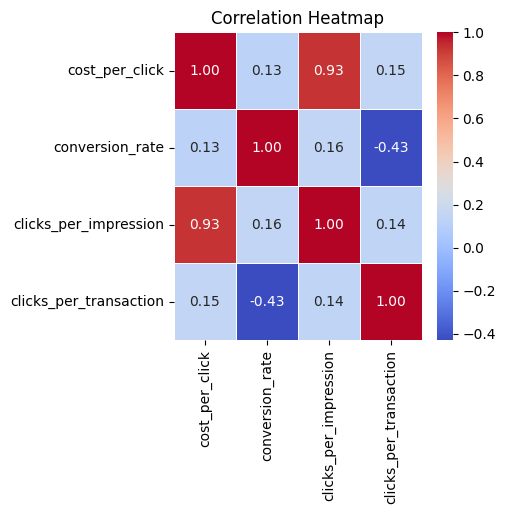

In [ ]:
derived_columns = ['cost_per_click', 'conversion_rate', 'clicks_per_impression', 'clicks_per_transaction']

selected_data = data[derived_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Hypothesis Testing

In [ ]:
#Null Hypothesis (H0): There is no correlation between CPC and CTR.
#Alternative Hypothesis (H1): There is a significant correlation between CPC and CTR.

In [ ]:
α = 0.05

from scipy.stats import pearsonr


cpc_data = data['cost_per_click']
CTR_data = data['CTR']

correlation_coefficient, p_value = pearsonr(cpc_data, CTR_data)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9293695343992947
P-value: 7.685426807310184e-70


In [ ]:
#Null Hypothesis (H0): There is no correlation between clicks per transaction and conversion rate (correlation coefficient = 0).
#Alternative Hypothesis (H1): There is a significant negative correlation between clicks per transaction and conversion rate.

α = 0.05

from scipy.stats import pearsonr

clicks_data = data['clicks_per_transaction']
conversion_rate_data = data['conversion_rate']

correlation_coefficient, p_value = pearsonr(clicks_data, conversion_rate_data)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.42956130181240154
P-value: 1.602355730964945e-08


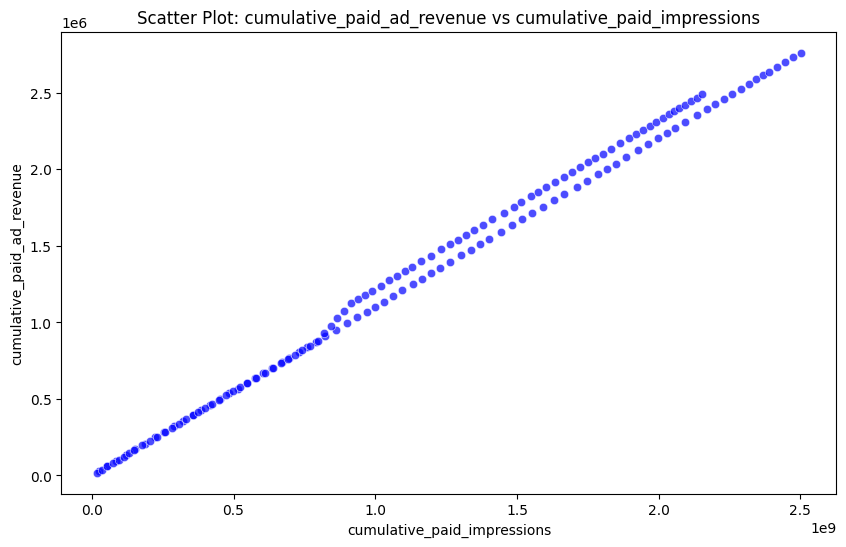

In [ ]:
cumulative_paid_impressions = data['cumulative_paid_impressions']
cumulative_paid_ad_revenue = data['cumulative_paid_ad_revenue']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=cumulative_paid_impressions, y=cumulative_paid_ad_revenue, color='blue', alpha=0.7)
plt.title('Scatter Plot: cumulative_paid_ad_revenue vs cumulative_paid_impressions')
plt.xlabel('cumulative_paid_impressions')
plt.ylabel('cumulative_paid_ad_revenue')
plt.show()

<ipython-input-85-a3edafc22087>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='paid_ad_revenue', data=data, ci=None, palette='viridis')
<ipython-input-85-a3edafc22087>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='paid_ad_revenue', data=data, ci=None, palette='viridis')


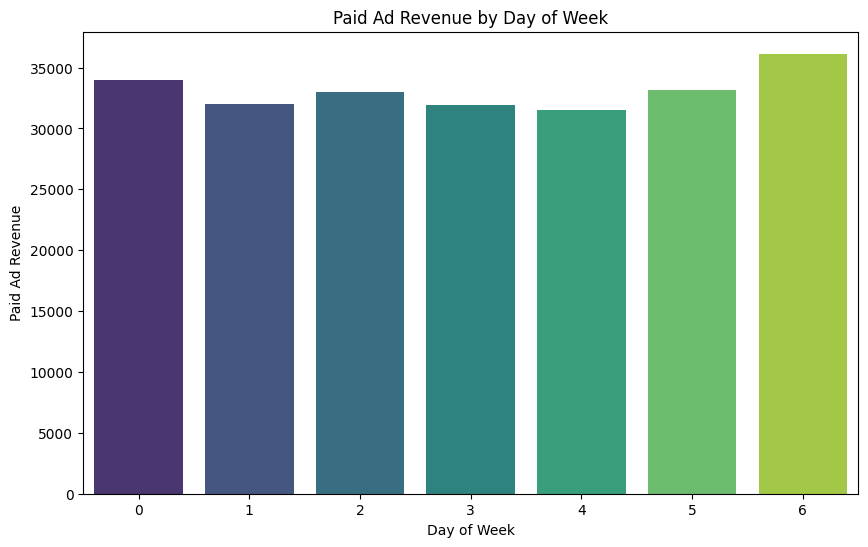

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='paid_ad_revenue', data=data, ci=None, palette='viridis')
plt.title('Paid Ad Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Paid Ad Revenue')
plt.show()

<ipython-input-86-cd4463376a03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='organic_page_views', data=data, ci=None, palette='viridis')
<ipython-input-86-cd4463376a03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='organic_page_views', data=data, ci=None, palette='viridis')


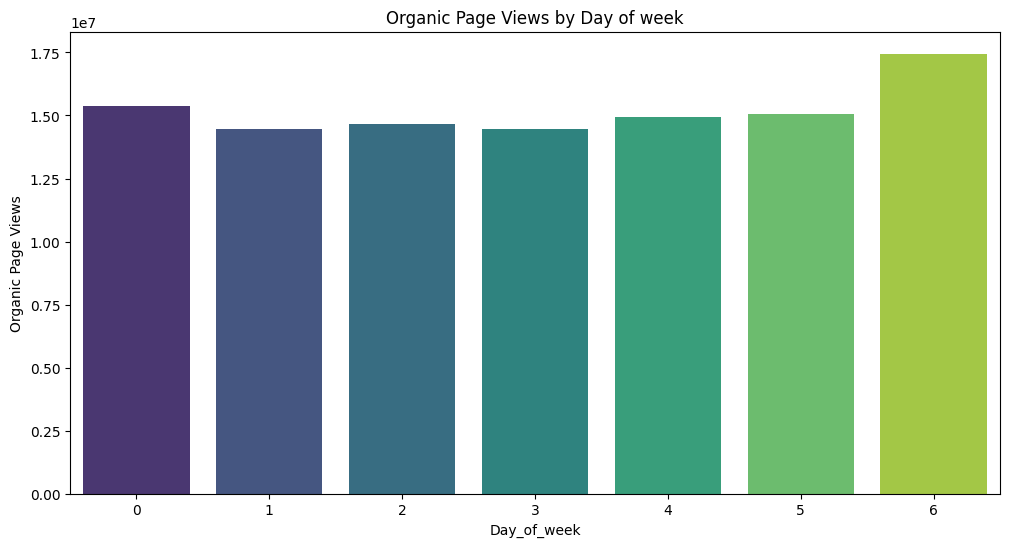

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='organic_page_views', data=data, ci=None, palette='viridis')
plt.title('Organic Page Views by Day of week')
plt.xlabel('Day_of_week')
plt.ylabel('Organic Page Views')
plt.show()

<ipython-input-189-5786ae065003>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='organic_sales_revenue_bins', data=data, ci=None, palette='viridis')
<ipython-input-189-5786ae065003>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='organic_sales_revenue_bins', data=data, ci=None, palette='viridis')


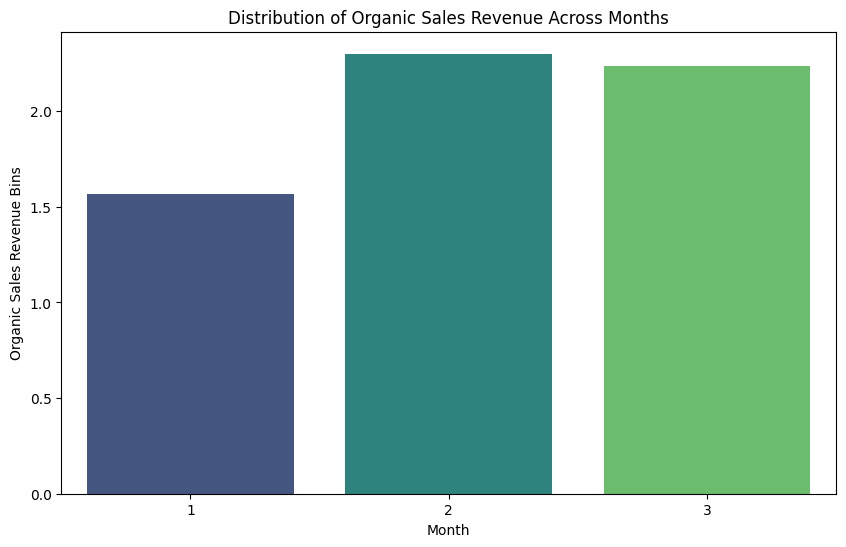

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='organic_sales_revenue_bins', data=data, ci=None, palette='viridis')
plt.title('Distribution of Organic Sales Revenue Across Months')
plt.xlabel('Month')
plt.ylabel('Organic Sales Revenue Bins')
plt.show()

<ipython-input-190-c957f412fbff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='retailer', y='clicks_per_transaction', data=data, ci=None, palette='viridis')
<ipython-input-190-c957f412fbff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='retailer', y='clicks_per_transaction', data=data, ci=None, palette='viridis')


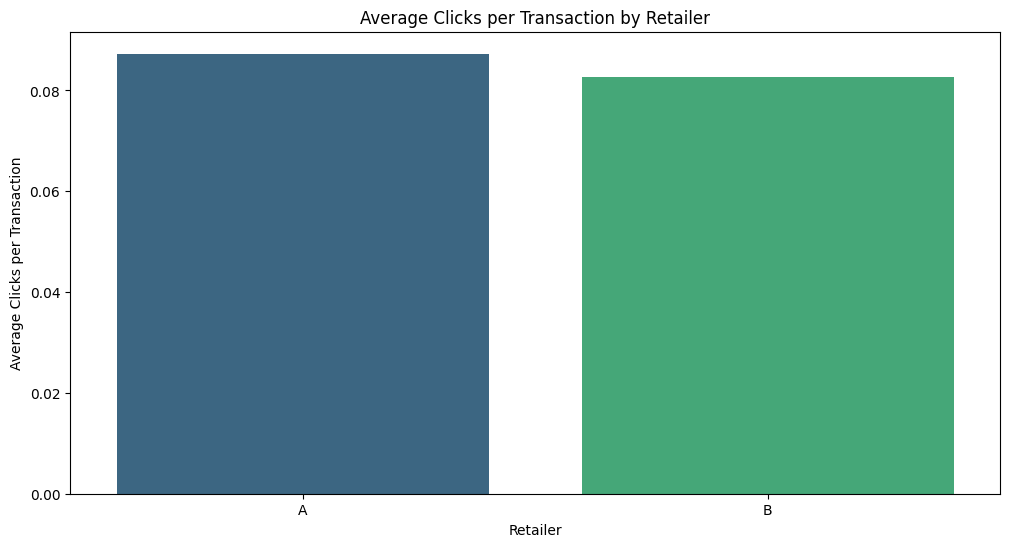

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='retailer', y='clicks_per_transaction', data=data, ci=None, palette='viridis')
plt.title('Average Clicks per Transaction by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Average Clicks per Transaction')
plt.show()

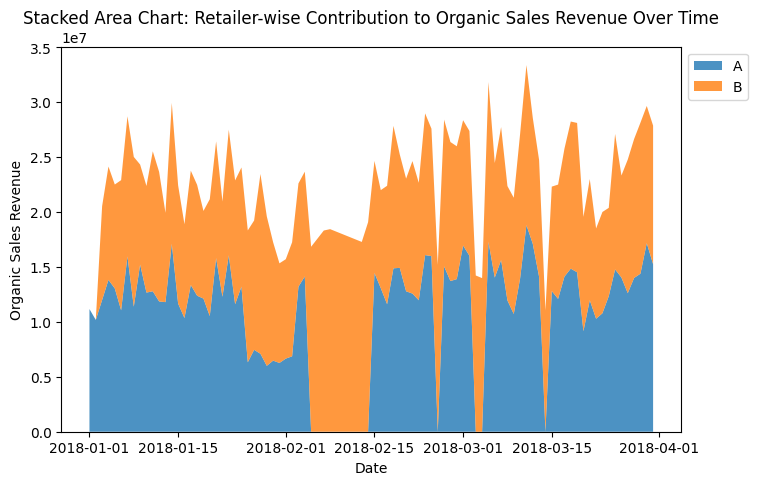

In [ ]:
data['date'] = pd.to_datetime(data['date'])
retailer_revenue = data.pivot_table(index='date', columns='retailer', values='organic_sales_revenue', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 5))
plt.stackplot(retailer_revenue.index, retailer_revenue.values.T, labels=retailer_revenue.columns, alpha=0.8)
plt.title('Stacked Area Chart: Retailer-wise Contribution to Organic Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Organic Sales Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

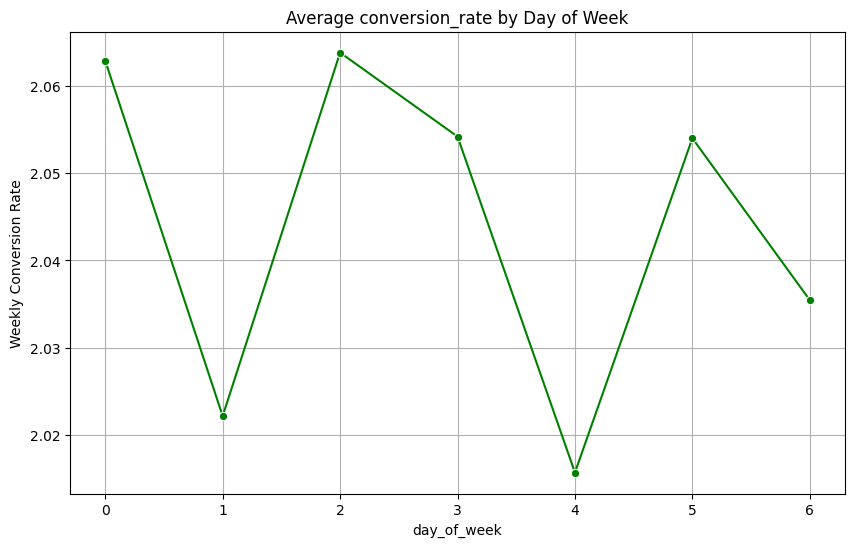

In [ ]:
weekly_conversion_rate = data.groupby('day_of_week')['conversion_rate_pct'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='conversion_rate_pct', data=weekly_conversion_rate, marker='o', color='green')
plt.title('Average conversion_rate by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly Conversion Rate')
plt.grid(True)
plt.show()

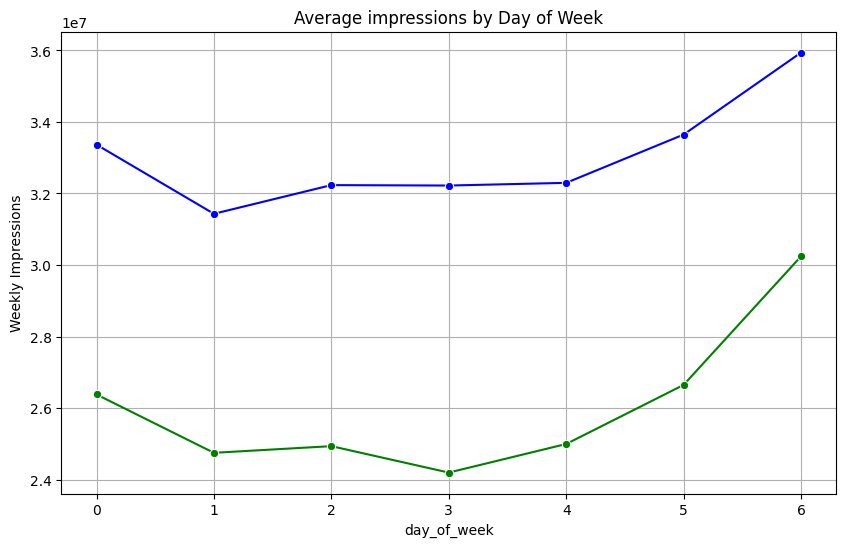

In [ ]:
weekly_paid_impressions = data.groupby(['day_of_week','retailer'])['paid_impressions'].mean().reset_index()
weekly_paid_impressions_B = weekly_paid_impressions[weekly_paid_impressions['retailer']=='B']
weekly_paid_impressions_A = weekly_paid_impressions[weekly_paid_impressions['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='paid_impressions', data=weekly_paid_impressions_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='paid_impressions', data=weekly_paid_impressions_A, marker='o', color='blue')
plt.title('Average impressions by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly Impressions')
plt.grid(True)
plt.show()

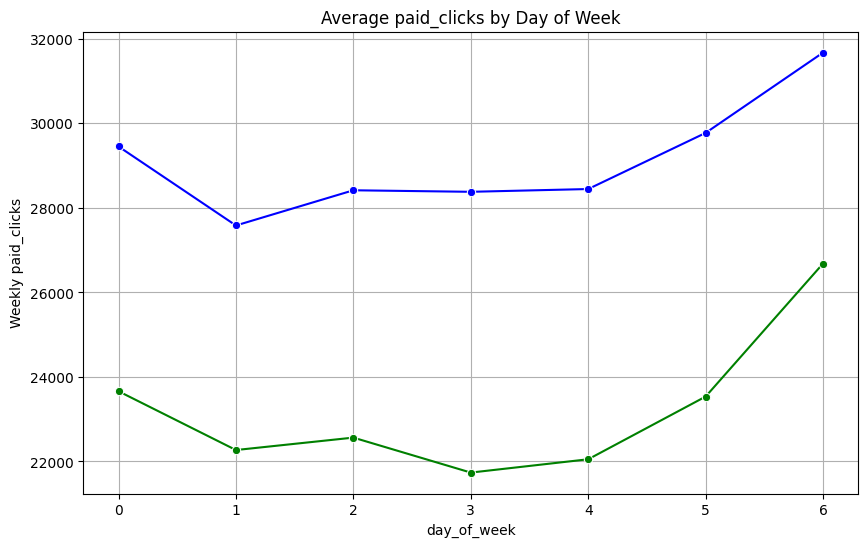

In [ ]:
weekly_paid_clicks = data.groupby(['day_of_week','retailer'])['paid_clicks'].mean().reset_index()
weekly_paid_clicks_B = weekly_paid_clicks[weekly_paid_clicks['retailer']=='B']
weekly_paid_clicks_A = weekly_paid_clicks[weekly_paid_clicks['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='paid_clicks', data=weekly_paid_clicks_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='paid_clicks', data=weekly_paid_clicks_A, marker='o', color='blue')
plt.title('Average paid_clicks by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly paid_clicks')
plt.grid(True)
plt.show()

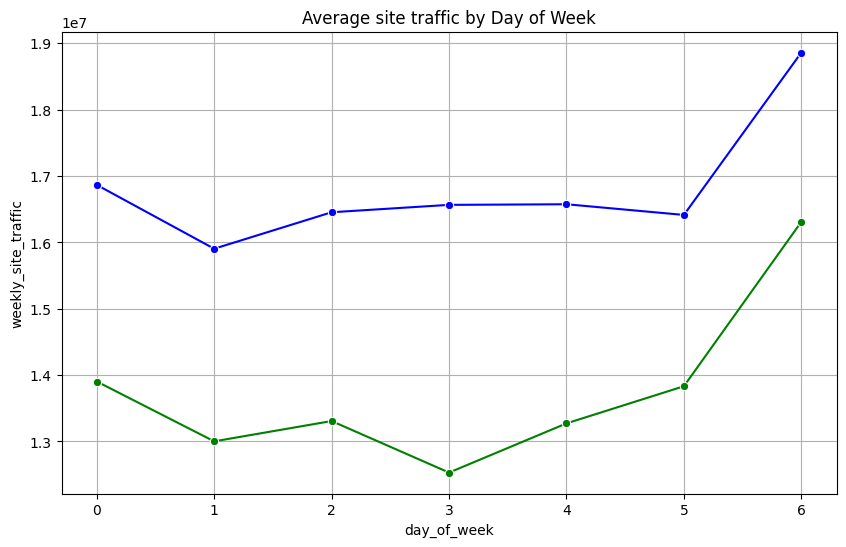

In [ ]:
weekly_site_traffic = data.groupby(['day_of_week','retailer'])['organic_page_views'].mean().reset_index()
weekly_site_traffic_B = weekly_site_traffic[weekly_site_traffic['retailer']=='B']
weekly_site_traffic_A = weekly_site_traffic[weekly_site_traffic['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='organic_page_views', data=weekly_site_traffic_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='organic_page_views', data=weekly_site_traffic_A, marker='o', color='blue')
plt.title('Average site traffic by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('weekly_site_traffic')
plt.grid(True)
plt.show()

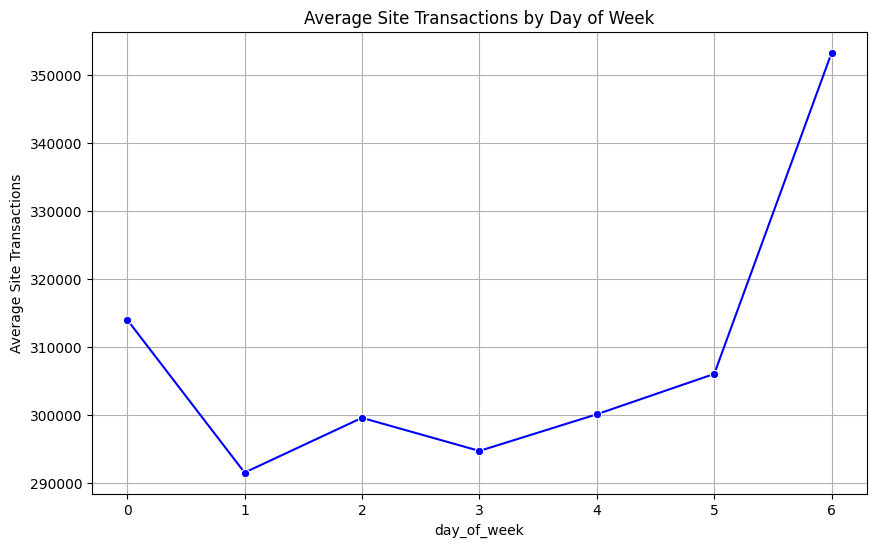

In [ ]:
weekly_site_transactions = data.groupby('day_of_week')['organic_transactions'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='organic_transactions', data=weekly_site_transactions, marker='o', color='blue')
plt.title('Average Site Transactions by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Average Site Transactions')
plt.grid(True)
plt.show()

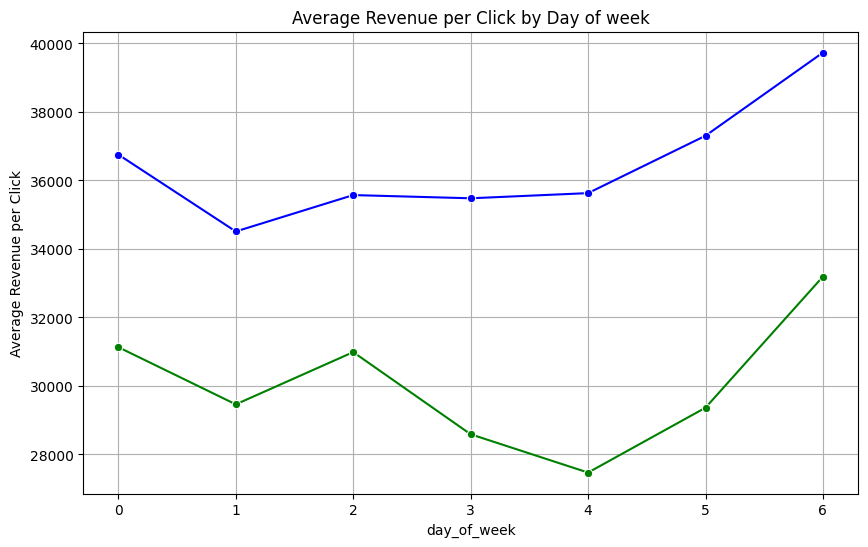

In [ ]:
weekly_revenue_per_click = data.groupby(['day_of_week','retailer'])['paid_ad_revenue'].mean().reset_index()
weekly_revenue_per_click_B = weekly_revenue_per_click[weekly_revenue_per_click['retailer']=='B']
weekly_revenue_per_click_A = weekly_revenue_per_click[weekly_revenue_per_click['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='paid_ad_revenue', data=weekly_revenue_per_click_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='paid_ad_revenue', data=weekly_revenue_per_click_A, marker='o', color='blue')
plt.title('Average Revenue per Click by Day of week')
plt.xlabel('day_of_week')
plt.ylabel('Average Revenue per Click')
plt.grid(True)
plt.show()

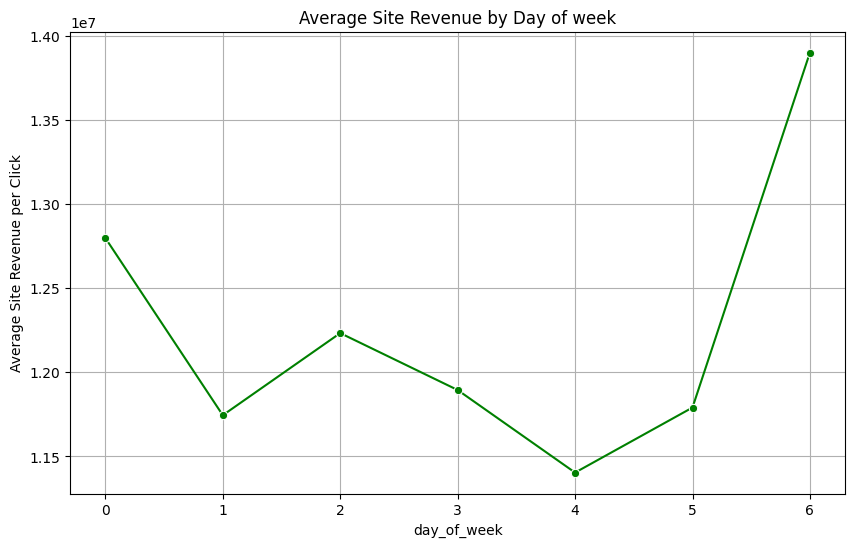

In [ ]:
weekly_site_revenue = data.groupby('day_of_week')['organic_sales_revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='organic_sales_revenue', data=weekly_site_revenue, marker='o', color='green')
plt.title('Average Site Revenue by Day of week')
plt.xlabel('day_of_week')
plt.ylabel('Average Site Revenue per Click')
plt.grid(True)
plt.show()

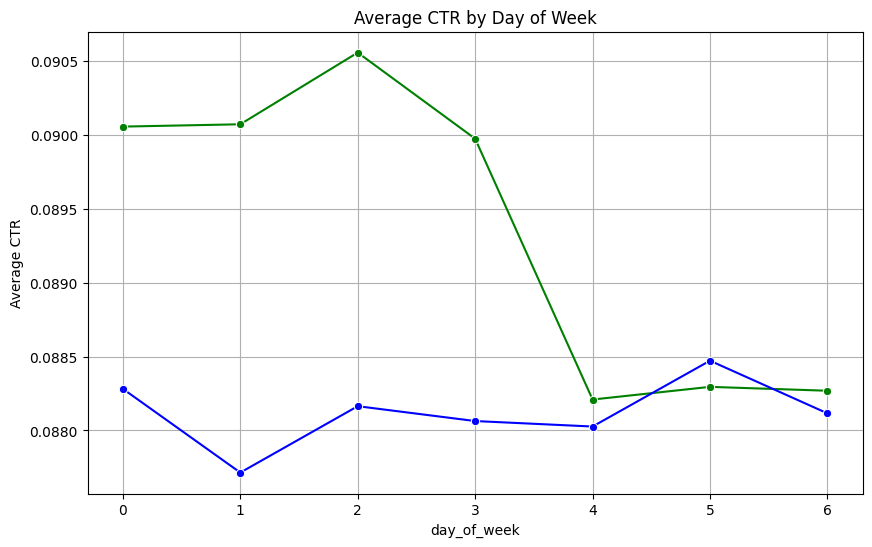

In [ ]:
weekly_ctr = data.groupby(['day_of_week','retailer'])['CTR'].mean().reset_index()
weekly_ctr_B = weekly_ctr[weekly_ctr['retailer']=='B']
weekly_ctr_A = weekly_ctr[weekly_ctr['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='CTR', data=weekly_ctr_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='CTR', data=weekly_ctr_A, marker='o', color='blue')
plt.title('Average CTR by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Average CTR')
plt.grid(True)
plt.show()

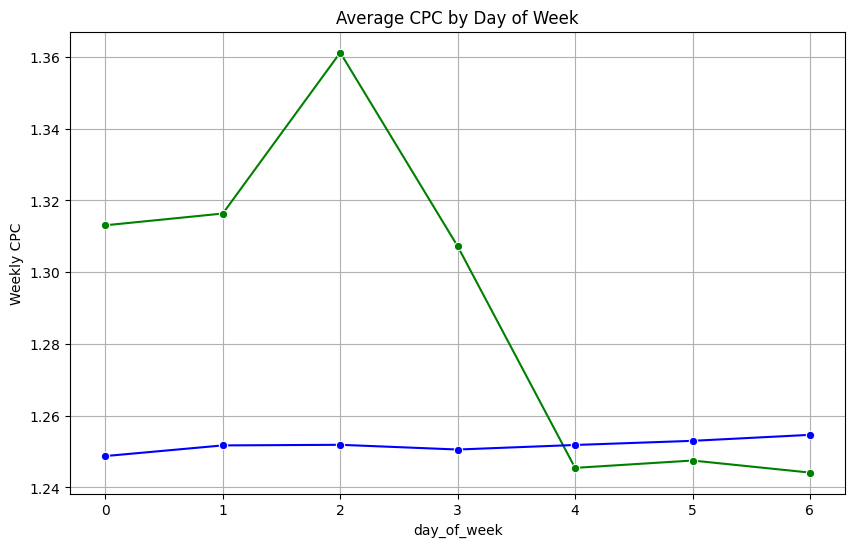

In [ ]:
weekly_cpc = data.groupby(['day_of_week','retailer'])['cost_per_click'].mean().reset_index()
weekly_cpc_B = weekly_cpc[weekly_cpc['retailer']=='B']
weekly_cpc_A = weekly_cpc[weekly_cpc['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='cost_per_click', data=weekly_cpc_B, marker='o', color='green')
sns.lineplot(x='day_of_week', y='cost_per_click', data=weekly_cpc_A, marker='o', color='blue')
plt.title('Average CPC by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly CPC')
plt.grid(True)
plt.show()

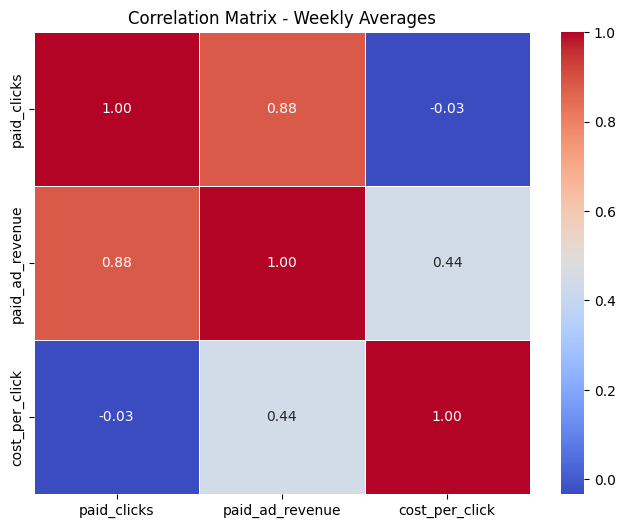

In [ ]:
weekly_averages = data[['paid_clicks', 'paid_ad_revenue', 'cost_per_click']]
correlation_matrix = weekly_averages.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix - Weekly Averages')
plt.show()


In [ ]:
corr, p_value = pearsonr(weekly_averages['paid_clicks'], weekly_averages['paid_ad_revenue'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: 0.8823150586232936, p-value: 2.963727682618348e-53


In [ ]:
corr, p_value = pearsonr(weekly_averages['paid_clicks'], weekly_averages['cost_per_click'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: -0.03334965955797703, p-value: 0.6764434049298167


In [ ]:
corr, p_value = pearsonr(weekly_averages['cost_per_click'], weekly_averages['paid_ad_revenue'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: 0.4408988885201646, p-value: 6.011907047794502e-09


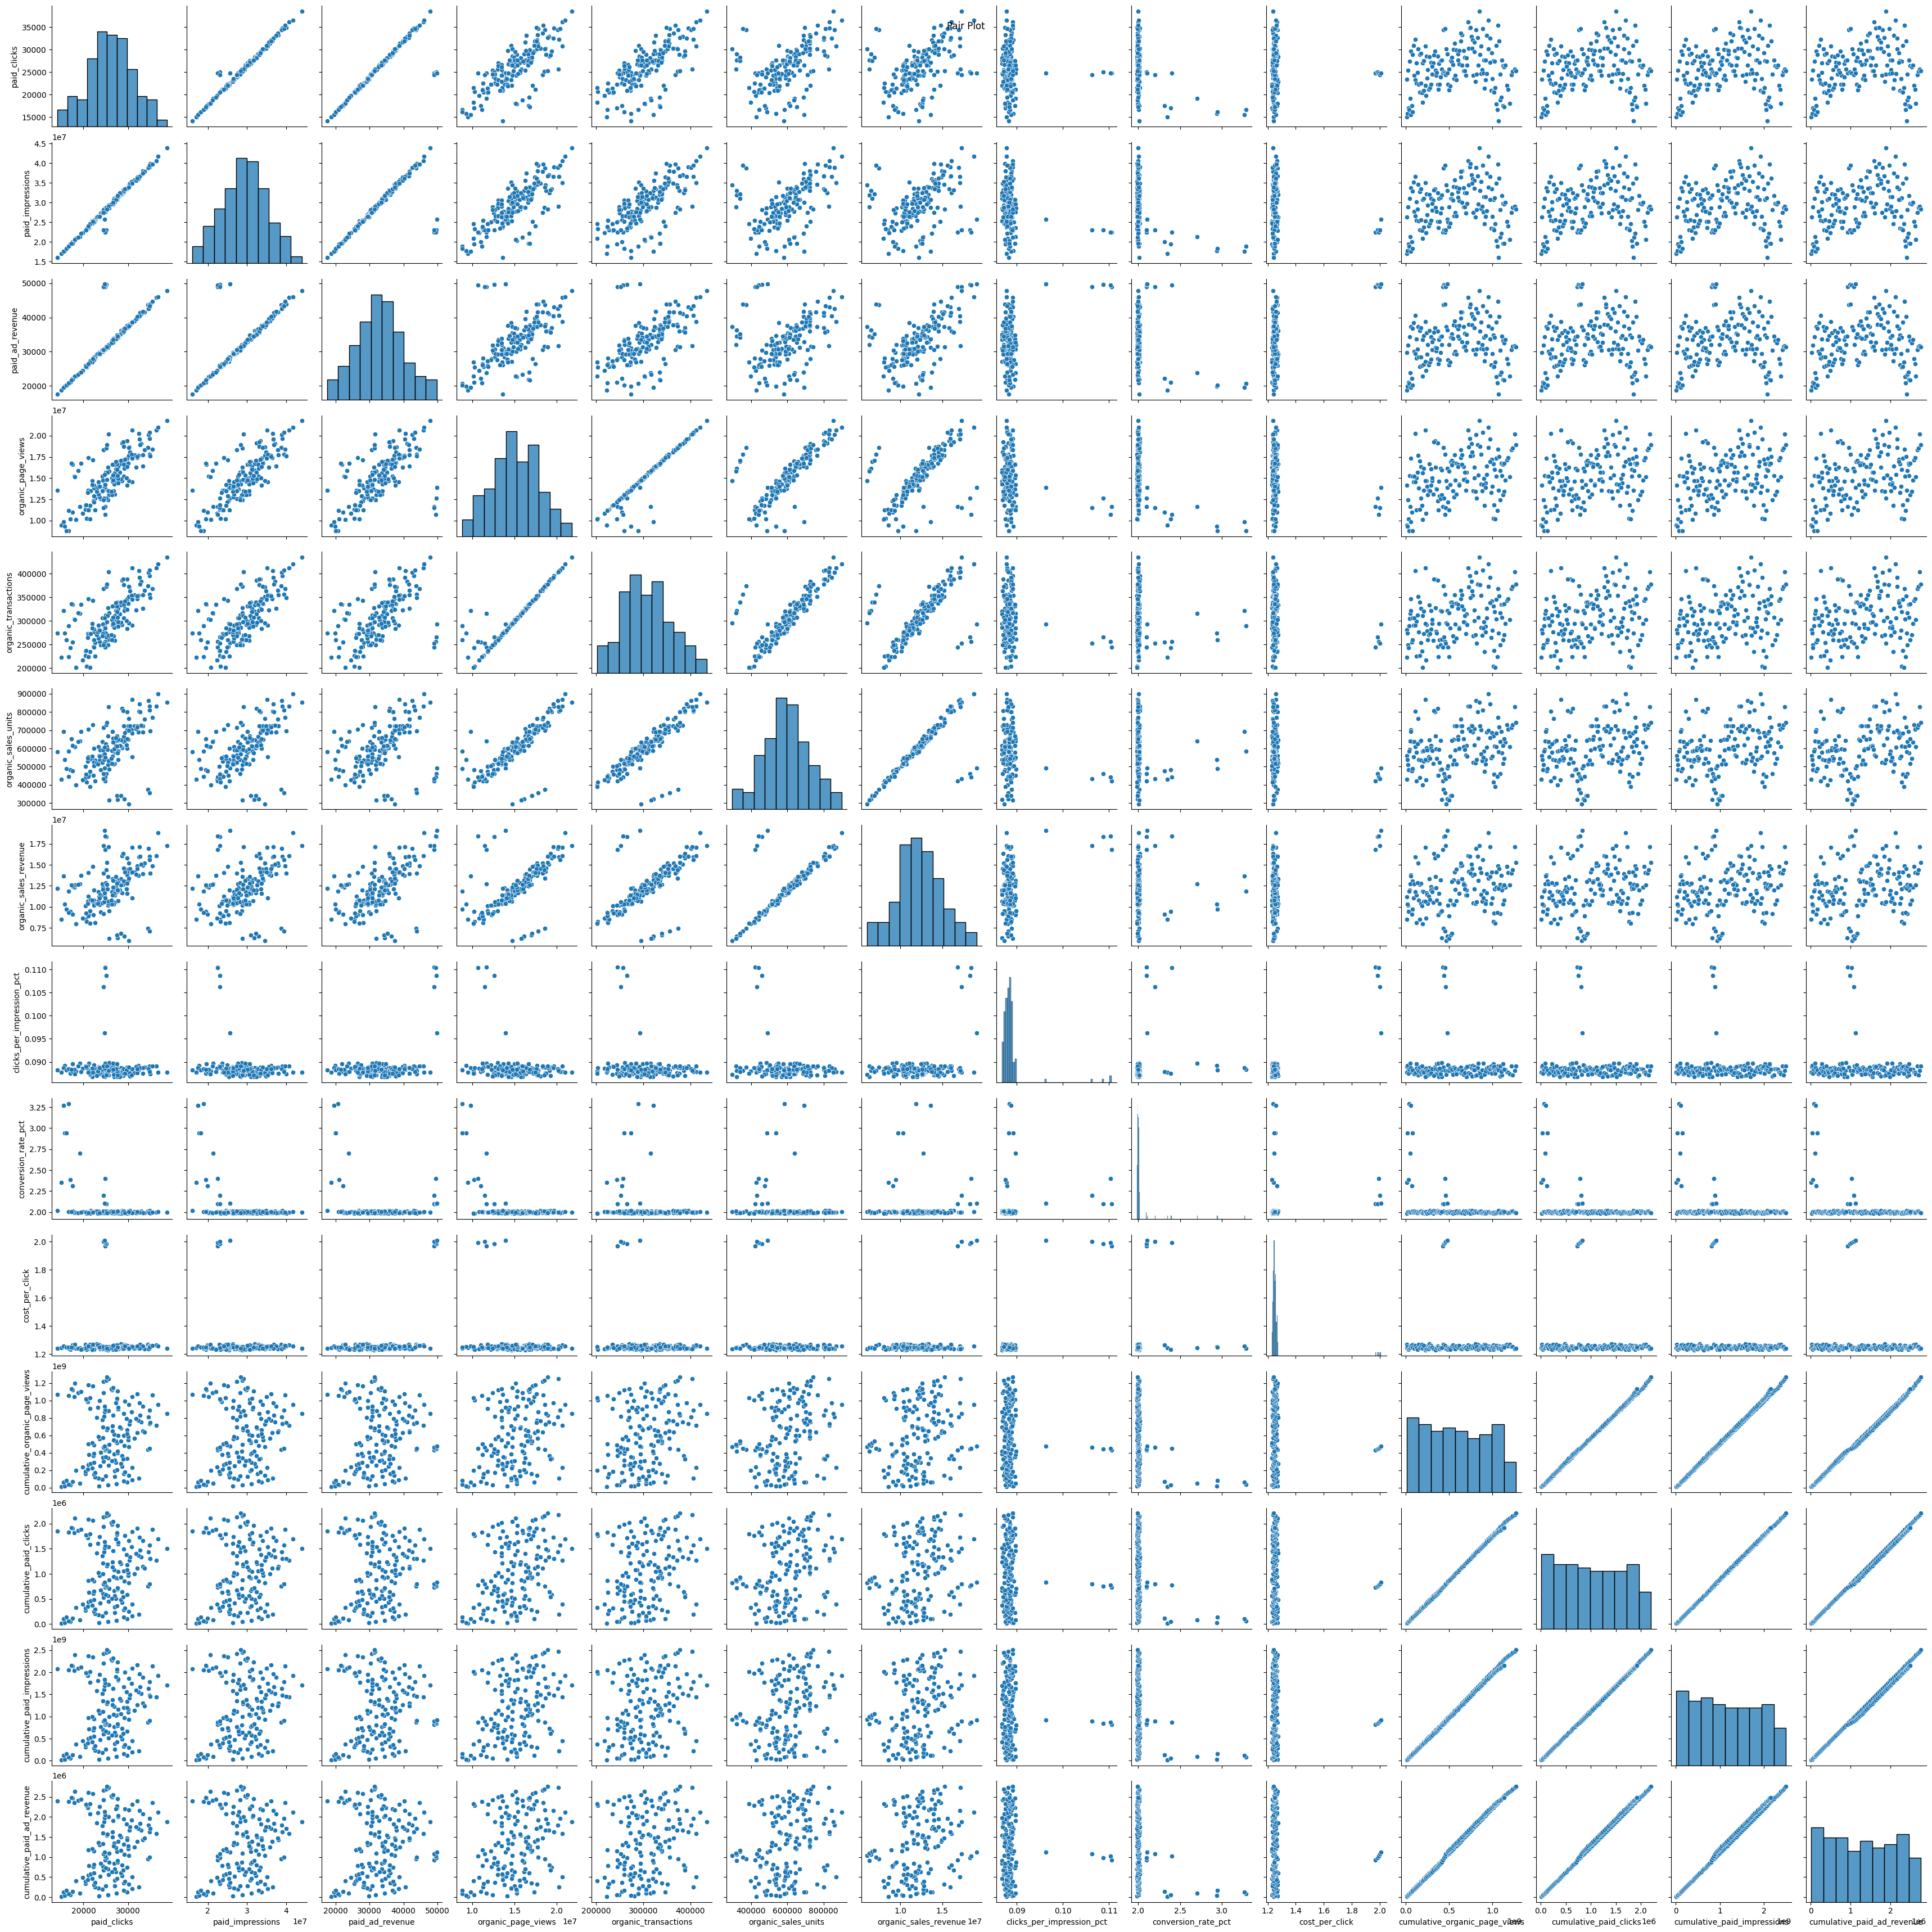

In [ ]:
selected_columns = [ 'paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views', 'organic_transactions', 'organic_sales_units','organic_sales_revenue','clicks_per_impression_pct', 'conversion_rate_pct','cost_per_click','cumulative_organic_page_views', 'cumulative_paid_clicks','cumulative_paid_impressions', 'cumulative_paid_ad_revenue',]
pair_plot_data = data[selected_columns]

sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot')
plt.show()

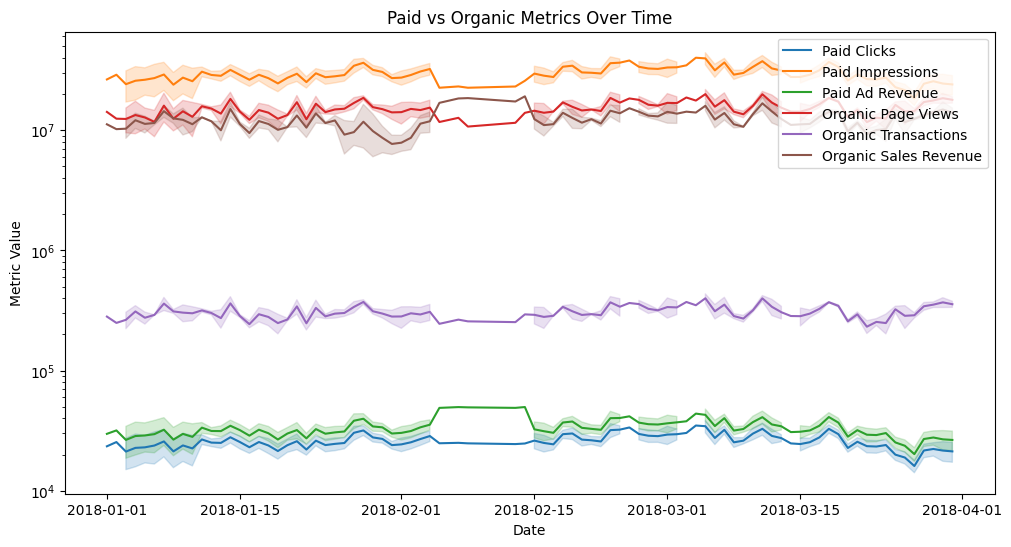

In [ ]:
plt.figure(figsize=(12, 6))

# Plot paid metrics
sns.lineplot(x='date', y='paid_clicks', data=data, label='Paid Clicks')
sns.lineplot(x='date', y='paid_impressions', data=data, label='Paid Impressions')
sns.lineplot(x='date', y='paid_ad_revenue', data=data, label='Paid Ad Revenue')

# Plot organic metrics
sns.lineplot(x='date', y='organic_page_views', data=data, label='Organic Page Views')
sns.lineplot(x='date', y='organic_transactions', data=data, label='Organic Transactions')
sns.lineplot(x='date', y='organic_sales_revenue', data=data, label='Organic Sales Revenue')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Paid vs Organic Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
data['clicks_to_page_views_ratio'] = 0.0

# Step 3: Calculate the ratio
data['clicks_to_page_views_ratio'] = data['paid_clicks'] / data['organic_page_views']


print(data[['paid_clicks', 'organic_page_views', 'clicks_to_page_views_ratio']].head())

            paid_clicks  organic_page_views  clicks_to_page_views_ratio
date                                                                   
2018-01-01        23459            14157871                    0.001657
2018-01-02        25444            12434724                    0.002046
2018-01-03        27403            15261160                    0.001796
2018-01-03        15008             9487355                    0.001582
2018-01-04        29680            17361350                    0.001710


In [ ]:
data['Ratio_paid_organic_revenue'] = 0.0

# Step 3: Calculate the ratio
data['Ratio_paid_organic_revenue'] = data['paid_ad_revenue'] / data['organic_sales_revenue']


print(data[['paid_ad_revenue', 'organic_sales_revenue', 'Ratio_paid_organic_revenue']].head())

            paid_ad_revenue  organic_sales_revenue  Ratio_paid_organic_revenue
date                                                                          
2018-01-01            29778               11167429                    0.002667
2018-01-02            31795               10178081                    0.003124
2018-01-03            34370               11996719                    0.002865
2018-01-03            18666                8541566                    0.002185
2018-01-04            37251               13824771                    0.002695


<Axes: xlabel='date', ylabel='Ratio_paid_organic_revenue'>

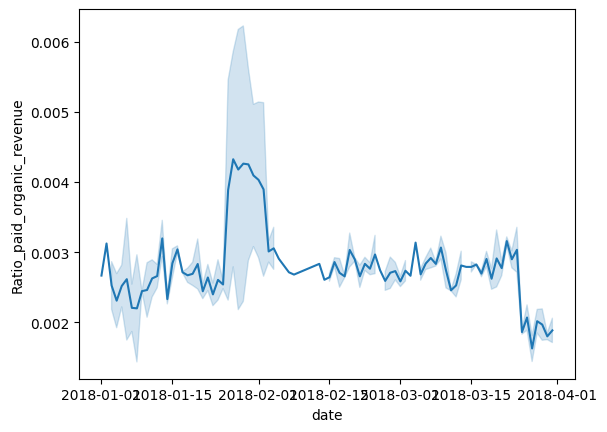

In [ ]:
sns.lineplot(data=data, x='date',y='Ratio_paid_organic_revenue')

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add a constant term for the intercept
data['intercept'] = 1.0

# Step 2: Fit a simple linear regression model
model = sm.OLS(data['organic_page_views'], data[['intercept', 'paid_clicks']])
results = model.fit()

# Step 3: Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     organic_page_views   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.23e-31
Time:                        11:35:09   Log-Likelihood:                -2515.1
No. Observations:                 159   AIC:                             5034.
Df Residuals:                     157   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    3.945e+06    7.7e+05      5.124      

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add a constant term for the intercept
data['intercept'] = 1.0

# Step 2: Fit a simple linear regression model
model = sm.OLS(data['organic_sales_revenue'], data[['intercept', 'paid_ad_revenue']])
results = model.fit()

# Step 3: Print the regression summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     organic_sales_revenue   R-squared:                       0.328
Model:                               OLS   Adj. R-squared:                  0.324
Method:                    Least Squares   F-statistic:                     76.60
Date:                   Sun, 28 Jan 2024   Prob (F-statistic):           3.11e-15
Time:                           11:40:07   Log-Likelihood:                -2547.9
No. Observations:                    159   AIC:                             5100.
Df Residuals:                        157   BIC:                             5106.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept   

In [ ]:
#Null Hypothesis (H0): Increased paid ad impressions have no effect on organic page views.
#Alternative Hypothesis (H1): Increased paid ad impressions lead to a subsequent rise in organic page views.

import statsmodels.api as sm

X = data['paid_impressions']
y = data['organic_page_views']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     organic_page_views   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           7.50e-34
Time:                        11:42:18   Log-Likelihood:                -2509.9
No. Observations:                 159   AIC:                             5024.
Df Residuals:                     157   BIC:                             5030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.978e+06   7.28e+05  

In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_impressions']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.7805295345725741
P-value: 7.5042596711767e-34
Reject the null hypothesis: There is a significant correlation.


In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_clicks']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.7636074825299635
P-value: 1.2339454626888569e-31
Reject the null hypothesis: There is a significant correlation.


In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_ad_revenue']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.5943875957237625
P-value: 1.4612237456379745e-16
Reject the null hypothesis: There is a significant correlation.


In [ ]:
data_filter = data[['date','paid_clicks','paid_impressions','CTR']].copy()

In [ ]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              159 non-null    datetime64[ns]
 1   paid_clicks       159 non-null    int64         
 2   paid_impressions  159 non-null    int64         
 3   CTR               159 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.1 KB


In [ ]:
data_filter.set_index('date',inplace = True)

In [ ]:
data_filter

paid_clicks  paid_impressions       CTR
date                                               
2018-01-01        23459          26364079  0.088981
2018-01-02        25444          28855109  0.088178
2018-01-03        27403          31057581  0.088233
2018-01-03        15008          17096417  0.087784
2018-01-04        29680          33698483  0.088075
...                 ...               ...       ...
2018-03-29        19446          22126026  0.087887
2018-03-30        25628          29086940  0.088108
2018-03-30        17605          19662055  0.089538
2018-03-31        25273          28359436  0.089117
2018-03-31        17288          19567122  0.088352

[159 rows x 3 columns]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_filter.index,y=data_filter['paid_clicks'],mode='lines',name='Clicks'))
fig.add_trace(go.Scatter(x=data_filter.index,y=data_filter['paid_impressions'],mode='lines',name='Impressions'))
fig.update_layout(title='Clicks and Impressions over time')
fig.show()

In [ ]:
fig=px.scatter(data_filter,x='paid_clicks',y='paid_impressions',title='Relationship between Clicks and Impressions',labels={'paid_clicks':'Clicks','paid_impressions':'Impressions'})
fig.update_layout(xaxis_title='Clicks',yaxis_title='Impressions')
fig.show()

In [ ]:
fig = px.line(data_filter,x=data.index,y='CTR',title='Click Through Rate over time')
fig.show()

In [ ]:
data_filter['DayofWeek'] = data_filter.index.dayofweek
data_filter['WeekofMonth'] = data_filter.index.to_series().dt.isocalendar().week // 4

In [ ]:
data_filter

paid_clicks  paid_impressions       CTR  DayofWeek  WeekofMonth
date                                                                       
2018-01-01        23459          26364079  0.088981          0            0
2018-01-02        25444          28855109  0.088178          1            0
2018-01-03        27403          31057581  0.088233          2            0
2018-01-03        15008          17096417  0.087784          2            0
2018-01-04        29680          33698483  0.088075          3            0
...                 ...               ...       ...        ...          ...
2018-03-29        19446          22126026  0.087887          3            3
2018-03-30        25628          29086940  0.088108          4            3
2018-03-30        17605          19662055  0.089538          4            3
2018-03-31        25273          28359436  0.089117          5            3
2018-03-31        17288          19567122  0.088352          5            3

[159 rows x 5 columns]

In [ ]:
day_of_week_ctr = data_filter.groupby('DayofWeek')['CTR'].mean().reset_index()

In [ ]:
day_of_week_ctr['DayOfweek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
day_of_week_ctr

DayofWeek       CTR DayOfweek
0          0  0.089168       Mon
1          1  0.088893       Tue
2          2  0.089516       Wed
3          3  0.089057       Thu
4          4  0.088118       Fri
5          5  0.088380       Sat
6          6  0.088200       Sun

In [ ]:
fig = px.bar(day_of_week_ctr,x='DayOfweek',y='CTR',title='Average CTR by Day of the week')
fig.show()

In [ ]:
data_filter['DayCategory'] = data_filter['DayofWeek'].apply(lambda x: 'Weekend' if x>=5 else 'WWekday')
ctr_by_day_category = data_filter.groupby('DayCategory')['CTR'].mean().reset_index()

fig = px.bar(ctr_by_day_category,x='DayCategory',y='CTR',title='Comparison of CTR on Weekdays Vs. Weekends',labels={'CTR':'Average CTR'})
fig.show()

In [ ]:
grouped_data = data_filter.groupby('DayCategory')[['paid_clicks', 'paid_impressions']].sum().reset_index()

# Create a grouped bar chart to visualize Clicks and Impressions on weekdays vs. weekends
fig = px.bar(grouped_data, x='DayCategory', y=['paid_clicks', 'paid_impressions'],
             title='Impressions and Clicks on Weekdays vs. Weekends',
             labels={'value': 'Count', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='Day Category')

fig.show()

In [ ]:
data_filter.reset_index(inplace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
time_series = data_filter.set_index('date')['CTR']

In [ ]:
time_series.index = pd.date_range(start=time_series.index[0], periods=len(time_series), freq='M')

In [ ]:
differenced_series = time_series.diff().dropna()

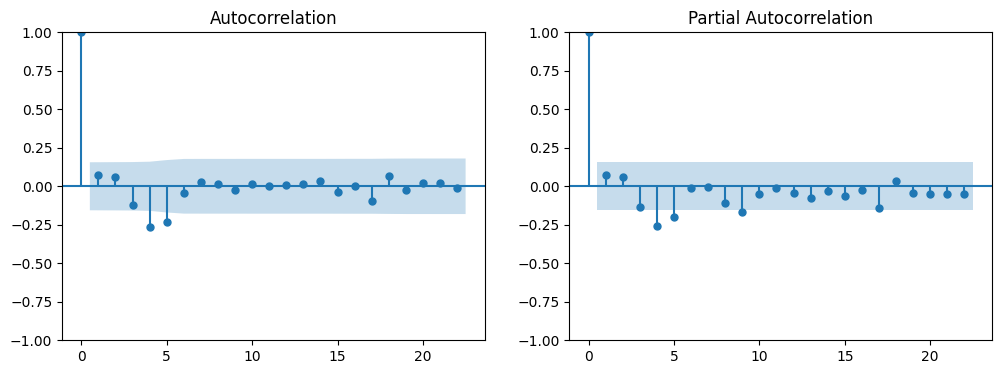

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q,s = 1,1,1,12

model = SARIMAX(time_series,order=(p,d,q),seasonal_order=(p,d,q,s))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  159
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 665.796
Date:                            Sun, 04 Feb 2024   AIC                          -1321.592
Time:                                    13:59:50   BIC                          -1306.674
Sample:                                01-31-2018   HQIC                         -1315.531
                                     - 03-31-2031                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0797      0.984     -0.081      0.935      -2.008       1.848
ma.L1          0.1511      0.985   

In [ ]:
future_steps=100
predictions = results.predict(len(time_series.index), len(time_series.index) + future_steps - 1)
print(predictions)

2031-04-30    0.087653
2031-05-31    0.088674
2031-06-30    0.087864
2031-07-31    0.088183
2031-08-31    0.088426
                ...   
2039-03-31    0.088245
2039-04-30    0.087610
2039-05-31    0.088603
2039-06-30    0.087772
2039-07-31    0.088133
Freq: M, Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index,y=forecast['Predictions'],mode='lines',name='Predictions'))
fig.add_trace(go.Scatter(x=forecast.index,y=forecast['Original'],mode='lines',name='Original Data'))



fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1,y=0.9),
                  showlegend=True)

fig.show()